In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from scipy.stats import uniform
from sklearn.cluster import AgglomerativeClustering


In [169]:
df = pd.read_csv('final_book_dataset_kaggle2.csv')
df.head(20)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [170]:
df.shape

(830, 19)

In [171]:
df.describe()

,price,avg_reviews
count,722.000000,702.000000
mean,46.491537,4.472080
std,63.292394,0.409608
min,0.990000,1.000000
25%,23.725000,4.325000
50%,39.490000,4.500000
75%,51.990000,4.700000
max,1318.740000,5.000000


In [172]:
df.isnull().any()

title                           False
author                           True
price                            True
price (including used books)     True
pages                            True
avg_reviews                      True
n_reviews                        True
star5                            True
star4                            True
star3                            True
star2                            True
star1                            True
dimensions                       True
weight                           True
language                         True
publisher                        True
ISBN_13                          True
link                            False
complete_link                   False
dtype: bool

In [173]:
df.head(20)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


Data cleaning

Converting n_reviews column to int

In [174]:
df.replace(',', '', regex=True, inplace=True)

In [175]:
print(df['n_reviews'].count())
df['n_reviews'] = df['n_reviews'].apply(lambda s: pd.to_numeric(s, errors='coerce')).fillna(0)
df['n_reviews'] = df['n_reviews'].astype(dtype=int)
df.head(20)

702


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,Notion Press Media Pvt Ltd (November 22 2021),978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,O'Reilly Media; 1st edition (August 18 2009),978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,[ Oz du Soleil and Bill Jelen],32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,Holy Macro! Books; Third edition (August 1 2022),978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686,75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,O'Reilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,For Dummies; 5th edition (February 3 2022),978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,O'Reilly Media; 1st edition (October 5 2021),978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,[ Matthew B. Miles A. Michael Huberman et al.],90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,SAGE Publications Inc; 4th edition (January 22...,Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,[ Gunnar Carlsson and Mikael Vejdemo-Johansson],54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,R in Action Third Edition: Data analysis and g...,[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,Manning; 3rd edition (May 3 2022),978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [176]:
df.describe()

,price,avg_reviews,n_reviews
count,722.000000,702.000000,830.000000
mean,46.491537,4.472080,275.549398
std,63.292394,0.409608,1231.225332
min,0.990000,1.000000,0.000000
25%,23.725000,4.325000,5.000000
50%,39.490000,4.500000,31.000000
75%,51.990000,4.700000,134.250000
max,1318.740000,5.000000,26560.000000


Converting pages column to int

In [177]:
print(f"count before replace: {df['pages'].count()}")
df['pages'] = df['pages'].apply(lambda s: pd.to_numeric(s, errors='coerce')).fillna(np.nan)
mean_num_pages = int(df['pages'].mean())
print(f'mean: {mean_num_pages}')
df['pages'].replace(np.nan, mean_num_pages, inplace=True)
print(f'count after replace: {df["pages"].count()}')
df['pages'] = df['pages'].astype(dtype=int)
df['pages']

count before replace: 745
mean: 391
count after replace: 830


0      500
1      484
2      274
3      547
4      368
      ... 
825    208
826    573
827    288
828    391
829    391
Name: pages, Length: 830, dtype: int32

In [178]:
df.describe()

,price,pages,avg_reviews,n_reviews
count,722.000000,830.000000,702.000000,830.000000
mean,46.491537,391.803614,4.472080,275.549398
std,63.292394,224.975171,0.409608,1231.225332
min,0.990000,6.000000,1.000000,0.000000
25%,23.725000,256.000000,4.325000,5.000000
50%,39.490000,384.000000,4.500000,31.000000
75%,51.990000,469.500000,4.700000,134.250000
max,1318.740000,2962.000000,5.000000,26560.000000


Converting star columns to float values and normalizing it to values between 0 and 1

In [179]:
columns = ['star5','star4','star3','star2','star1']
df[columns] = df[columns].replace('%', '', regex=True).astype(float)
df[columns] = df[columns].replace(np.nan, 0.0)
print(df[columns])
df[columns] = df[columns].apply(lambda percent: percent/100.0)
df[columns]

     star5  star4  star3  star2  star1
0     55.0   39.0    6.0    0.0    0.0
1     61.0   20.0    9.0    4.0    6.0
2     87.0   13.0    0.0    0.0    0.0
3     75.0   16.0    5.0    2.0    2.0
4     52.0   17.0   10.0   10.0   10.0
..     ...    ...    ...    ...    ...
825   72.0   14.0    7.0    2.0    4.0
826   78.0    7.0    7.0    4.0    4.0
827   83.0   17.0    0.0    0.0    0.0
828    0.0    0.0    0.0    0.0    0.0
829   79.0   15.0    4.0    1.0    1.0

[830 rows x 5 columns]


,star5,star4,star3,star2,star1
0,0.55,0.39,0.06,0.00,0.00
1,0.61,0.20,0.09,0.04,0.06
2,0.87,0.13,0.00,0.00,0.00
3,0.75,0.16,0.05,0.02,0.02
4,0.52,0.17,0.10,0.10,0.10
...,...,...,...,...,...
825,0.72,0.14,0.07,0.02,0.04
826,0.78,0.07,0.07,0.04,0.04
827,0.83,0.17,0.00,0.00,0.00
828,0.00,0.00,0.00,0.00,0.00


Converting weight values to float in kg

In [180]:
POUND_TO_KG = 0.4535923
OUNCE_TO_KG = 0.0283495
df.weight = df.weight.replace(np.nan, 'NaN')
weight_column = df.weight.apply(lambda x: x.split()[-1])
print(len(weight_column))
weight_column.unique()

830


array(['pounds', 'NaN', 'ounces'], dtype=object)

In [181]:
def pounds_and_ounces_to_kg(cell):
    if 'pounds' in cell:
        cell = float(cell.split()[0])
        cell *= POUND_TO_KG
    elif 'ounces' in cell:
        cell = float(cell.split()[0])
        cell *= OUNCE_TO_KG
    return cell

df['weight'] = df['weight'].apply(pounds_and_ounces_to_kg)
df.weight = df.weight.replace('NaN', np.nan)
mean_weight = df['weight'].mean()
print(f'mean_weight: {mean_weight}')
df.weight = df.weight.replace(np.nan, mean_weight)
df.weight

mean_weight: 0.7613544008853846


0      1.147589
1      0.889041
2      0.635029
3      0.666781
4      0.589670
         ...   
825    0.439417
826    1.020583
827    0.498952
828    0.761354
829    0.761354
Name: weight, Length: 830, dtype: float64

In [182]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,weight
count,722.000000,830.000000,702.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,46.491537,391.803614,4.472080,275.549398,0.617024,0.130964,0.057783,0.023313,0.016687,0.761354
std,63.292394,224.975171,0.409608,1231.225332,0.296359,0.105583,0.061847,0.032662,0.029853,0.749672
min,0.990000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000992
25%,23.725000,256.000000,4.325000,5.000000,0.552500,0.042500,0.000000,0.000000,0.000000,0.491014
50%,39.490000,384.000000,4.500000,31.000000,0.700000,0.130000,0.050000,0.010000,0.000000,0.761354
75%,51.990000,469.500000,4.700000,134.250000,0.790000,0.190000,0.090000,0.030000,0.030000,0.801724
max,1318.740000,2962.000000,5.000000,26560.000000,1.000000,0.640000,0.490000,0.220000,0.290000,13.698487


In [183]:
mean_avg_reviews = df['avg_reviews'].mean()
df['avg_reviews'] = df['avg_reviews'].replace(np.nan, mean_avg_reviews)
df['avg_reviews']

0      4.40000
1      4.30000
2      4.70000
3      4.60000
4      3.90000
        ...   
825    4.50000
826    4.50000
827    4.80000
828    4.47208
829    4.70000
Name: avg_reviews, Length: 830, dtype: float64

In [184]:
mean_price = df['price'].mean()
df['price'] = df['price'].replace(np.nan, mean_price)
df['price']

0       6.750000
1      33.720000
2      32.070000
3      53.990000
4      24.490000
         ...    
825     5.330000
826    55.180000
827    44.990000
828    46.491537
829    38.490000
Name: price, Length: 830, dtype: float64

# Handling missing values for language and publisher

In [185]:
nan_values_df = df[['language', 'publisher']].isna().sum() / len(df)
nan_values_df

language     0.085542
publisher    0.139759
dtype: float64

ima oko 116 nan publisher-a verovatno bolje dodati unknown da ne bi smanjili broj vrsta

In [186]:
df_no_unknown_language = df[df['language'].notna()]
df_no_unknown_language.language.value_counts()
df_no_unknown_language

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,8.5 x 1.01 x 11 inches,1.147589,English,Notion Press Media Pvt Ltd (November 22 2021),978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,0.889041,English,O'Reilly Media; 1st edition (August 18 2009),978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,[ Oz du Soleil and Bill Jelen],32.07,32.07,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,8.25 x 0.6 x 10.75 inches,0.635029,English,Holy Macro! Books; Third edition (August 1 2022),978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,0.666781,English,O'Reilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,0.589670,English,For Dummies; 5th edition (February 3 2022),978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,ColorWise: A Data Storyteller's Guide to the I...,[ Kate Strachnyi],29.99,29.99,165,4.47208,0,0.00,0.00,0.00,0.00,0.00,6 x 0.46 x 9 inches,0.309010,English,O'Reilly Media; 1st edition (December 20 2022),978-1492097846,/ColorWise-Storytellers-Guide-Intentional-Colo...,https://www.amazon.com/ColorWise-Storytellers-...
824,Data Science (The MIT Press Essential Knowledg...,NaN,9.69,9.69,280,4.50000,404,0.67,0.21,0.07,0.03,0.02,5 x 0.57 x 6.9 inches,0.249476,English,The MIT Press; Illustrated edition (April 13 2...,99,/Data-Science-Press-Essential-Knowledge/dp/026...,https://www.amazon.com/Data-Science-Press-Esse...
825,Deep Learning: Engage the World Change the World,[ Michael Fullan Joanne Quinn et al.],5.33,8.55 - 35.33,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,7 x 0.47 x 10 inches,0.439417,English,Corwin; First edition (December 15 2017),59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,[ Matthew F. Dixon Igor Halperin et al.],55.18,52.41 - 55.18,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,6.14 x 1.25 x 9.21 inches,1.020583,English,Springer; 1st ed. 2020 edition (July 2 2020),,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...


In [187]:
df[['language', 'publisher']] = df[['language', 'publisher']].replace(np.nan, 'Other')
df['language'].value_counts()

English                                                                                                                                                                 745
Other                                                                                                                                                                    71
Spanish                                                                                                                                                                   4
Scroll to the top of the page and click the                                                                                                                               1
English (DTS-HD Master Audio 5.1) French (DTS-HD 2.0)                                                                                                                     1
This Python programming guide assumes certain level of programming knowledge. It is not a beginner textbook.                                

In [188]:
def get_language(cell):
    # if 'Japanese' in cell:
    #     return 'Japanese'
    # elif 'French' in cell:
    #     return 'French'
    if 'English' in cell:
        return 'English'
    elif 'Spanish' in cell:
        return 'Spanish'
    else:
        return 'other'
df.language = df.language.apply(get_language)
print(len(df['language'].value_counts()))
df['language'].value_counts()

3


English    748
other       78
Spanish      4
Name: language, dtype: int64

##  Ciscenje publisher kolone 20 i others


In [189]:
def clean_publisher_str(cell):
    if ';' in cell:
        return cell.split(';')[0].strip()
    else:
        return cell.split('(')[0].strip()

df.publisher = df.publisher.apply(clean_publisher_str)
df.publisher.value_counts()

Other                                                 116
Packt Publishing                                      101
Independently published                                81
O'Reilly Media                                         78
No Starch Press                                        36
                                                     ... 
National Science Teachers Association - NSTA Press      1
New Degree Press                                        1
ASCD                                                    1
Morgan Kaufmann                                         1
Brooks Cole                                             1
Name: publisher, Length: 150, dtype: int64

In [190]:
temp = pd.DataFrame(df.publisher.value_counts()[:20])
top_publishers = temp.T.columns

def remove_low_occurring_publishers(publisher):
    if publisher in top_publishers:
        return publisher
    else:
        return 'Others'

df.publisher = df.publisher.apply(remove_low_occurring_publishers)

In [191]:
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,0.55,0.39,0.06,0.00,0.00,8.5 x 1.01 x 11 inches,1.147589,English,Others,978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,0.889041,English,O'Reilly Media,978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,[ Oz du Soleil and Bill Jelen],32.07,32.07,274,4.7,10,0.87,0.13,0.00,0.00,0.00,8.25 x 0.6 x 10.75 inches,0.635029,English,Others,978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,0.666781,English,O'Reilly Media,978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,0.589670,English,For Dummies,978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


#### Ciscenje dimensions kolone

In [192]:
def clean_dimensions_str(cell):
    cell_to_check = str(cell)
    if len(cell_to_check.split('x')) < 2:
        return cell
    else:
        return cell.split('x')[0].strip() + ' x ' + cell.split('x')[2].strip().split('inches')[0]
df_dimensions = df.dimensions.apply(clean_dimensions_str)
print(len(df_dimensions.value_counts(dropna=False)))
df_dimensions.value_counts(dropna=False)

197


NaN              186
7.5 x 9.25       109
6 x 9             68
7.38 x 9.25       36
7 x 10            27
                ... 
6.4 x 9.4          1
8.25 x 10.25       1
7.4 x 9            1
1.4 x 8.9          1
7 x 10.1           1
Name: dimensions, Length: 197, dtype: int64

#### Enkodiranje kategorickih vrednosti

In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.publisher = label_encoder.fit_transform(df.publisher)
df.publisher

0      12
1      10
2      12
3      10
4       5
       ..
825    12
826    18
827    13
828    11
829    11
Name: publisher, Length: 830, dtype: int32

In [194]:
df.language = label_encoder.fit_transform(df.language)
df.dimensions = label_encoder.fit_transform(df.dimensions)

In [195]:
df = df.drop(['author', 'ISBN_13', 'link', 'complete_link'], axis=1)

In [196]:
df.shape

(830, 15)

In [197]:
mean_price = df['price'].mean()
df['price'] = df['price'].replace('NaN', mean_price)
df

,title,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,Data Analysis Using R (Low Priced Edition): A ...,6.750000,6.75,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,Head First Data Analysis: A learner's guide to...,33.720000,21.49 - 33.72,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,Guerrilla Data Analysis Using Microsoft Excel:...,32.070000,32.07,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,Python for Data Analysis: Data Wrangling with ...,53.990000,53.99,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,Excel Data Analysis For Dummies (For Dummies (...,24.490000,24.49,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,5.330000,8.55 - 35.33,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,Machine Learning in Finance: From Theory to Pr...,55.180000,52.41 - 55.18,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,Practical Deep Learning at Scale with MLflow: ...,44.990000,44.99,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,Clinical Biostatistics and Epidemiology Made R...,46.491537,NaN,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


In [198]:
df['price (including used books)']

0                 6.75
1       21.49 - 33.72 
2                32.07
3                53.99
4                24.49
            ...       
825      8.55 - 35.33 
826     52.41 - 55.18 
827              44.99
828                NaN
829              38.49
Name: price (including used books), Length: 830, dtype: object

In [199]:
df = df.drop(['title'], axis=1)

In [200]:
df

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,6.750000,6.75,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,33.720000,21.49 - 33.72,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,32.070000,32.07,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,53.990000,53.99,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,24.490000,24.49,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,5.330000,8.55 - 35.33,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,55.180000,52.41 - 55.18,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,44.990000,44.99,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,46.491537,NaN,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


In [201]:
df['price (including used books)'][1]

' 21.49 - 33.72 '

In [202]:
df['price (including used books)'][828]

nan

In [203]:
dfcopy = df.copy()
dfcopy

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,6.750000,6.75,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,33.720000,21.49 - 33.72,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,32.070000,32.07,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,53.990000,53.99,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,24.490000,24.49,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,5.330000,8.55 - 35.33,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,55.180000,52.41 - 55.18,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,44.990000,44.99,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,46.491537,NaN,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


#### Svodjenje vrednosti kolone "price (including used books)" na float vrednosti. Ukoliko je dat raspon vrednosti, svodjenje na srednju, a ukoliko je data NaN vrednost, svodjenje na mean

In [204]:
for x, prices_ in enumerate(dfcopy['price (including used books)']) :
    if not isinstance(prices_, float):
        array_of_nums = prices_.split(' - ')
        if len(array_of_nums) > 1 :
            min_att = float(array_of_nums[0])
            max_att = float(array_of_nums[1])
            mean_att = float((min_att + max_att)/2)
            dfcopy['price (including used books)'][x] = mean_att

C:\Users\nikol\AppData\Local\Temp/ipykernel_7436/2833010273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [205]:
dfcopy

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,6.750000,6.75,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,33.720000,27.605,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,32.070000,32.07,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,53.990000,53.99,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,24.490000,24.49,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,5.330000,21.94,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,55.180000,53.795,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,44.990000,44.99,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,46.491537,NaN,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


In [206]:
dfcopy['price (including used books)'] = [float(i) for i in dfcopy['price (including used books)']]

mean_price = dfcopy['price (including used books)'].mean()
dfcopy['price (including used books)'] = dfcopy['price (including used books)'].replace(np.nan, mean_price)
dfcopy

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,6.750000,6.750000,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,33.720000,27.605000,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,32.070000,32.070000,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,53.990000,53.990000,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,24.490000,24.490000,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,5.330000,21.940000,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,55.180000,53.795000,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,44.990000,44.990000,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,46.491537,43.064896,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


In [207]:
df = dfcopy.copy()
df

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,6.750000,6.750000,500,4.40000,23,0.55,0.39,0.06,0.00,0.00,521,1.147589,0,12
1,33.720000,27.605000,484,4.30000,124,0.61,0.20,0.09,0.04,0.06,477,0.889041,0,10
2,32.070000,32.070000,274,4.70000,10,0.87,0.13,0.00,0.00,0.00,489,0.635029,0,12
3,53.990000,53.990000,547,4.60000,1686,0.75,0.16,0.05,0.02,0.02,240,0.666781,0,10
4,24.490000,24.490000,368,3.90000,12,0.52,0.17,0.10,0.10,0.10,336,0.589670,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,5.330000,21.940000,208,4.50000,74,0.72,0.14,0.07,0.02,0.04,194,0.439417,0,12
826,55.180000,53.795000,573,4.50000,93,0.78,0.07,0.07,0.04,0.04,123,1.020583,0,18
827,44.990000,44.990000,288,4.80000,8,0.83,0.17,0.00,0.00,0.00,383,0.498952,0,13
828,46.491537,43.064896,391,4.47208,0,0.00,0.00,0.00,0.00,0.00,540,0.761354,2,11


In [208]:
# df = df.drop(['publisher'], axis=1)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'price (including used books)'}>,
        <AxesSubplot:title={'center':'pages'}>,
        <AxesSubplot:title={'center':'avg_reviews'}>],
       [<AxesSubplot:title={'center':'n_reviews'}>,
        <AxesSubplot:title={'center':'star5'}>,
        <AxesSubplot:title={'center':'star4'}>,
        <AxesSubplot:title={'center':'star3'}>],
       [<AxesSubplot:title={'center':'star2'}>,
        <AxesSubplot:title={'center':'star1'}>,
        <AxesSubplot:title={'center':'dimensions'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'language'}>,
        <AxesSubplot:title={'center':'publisher'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

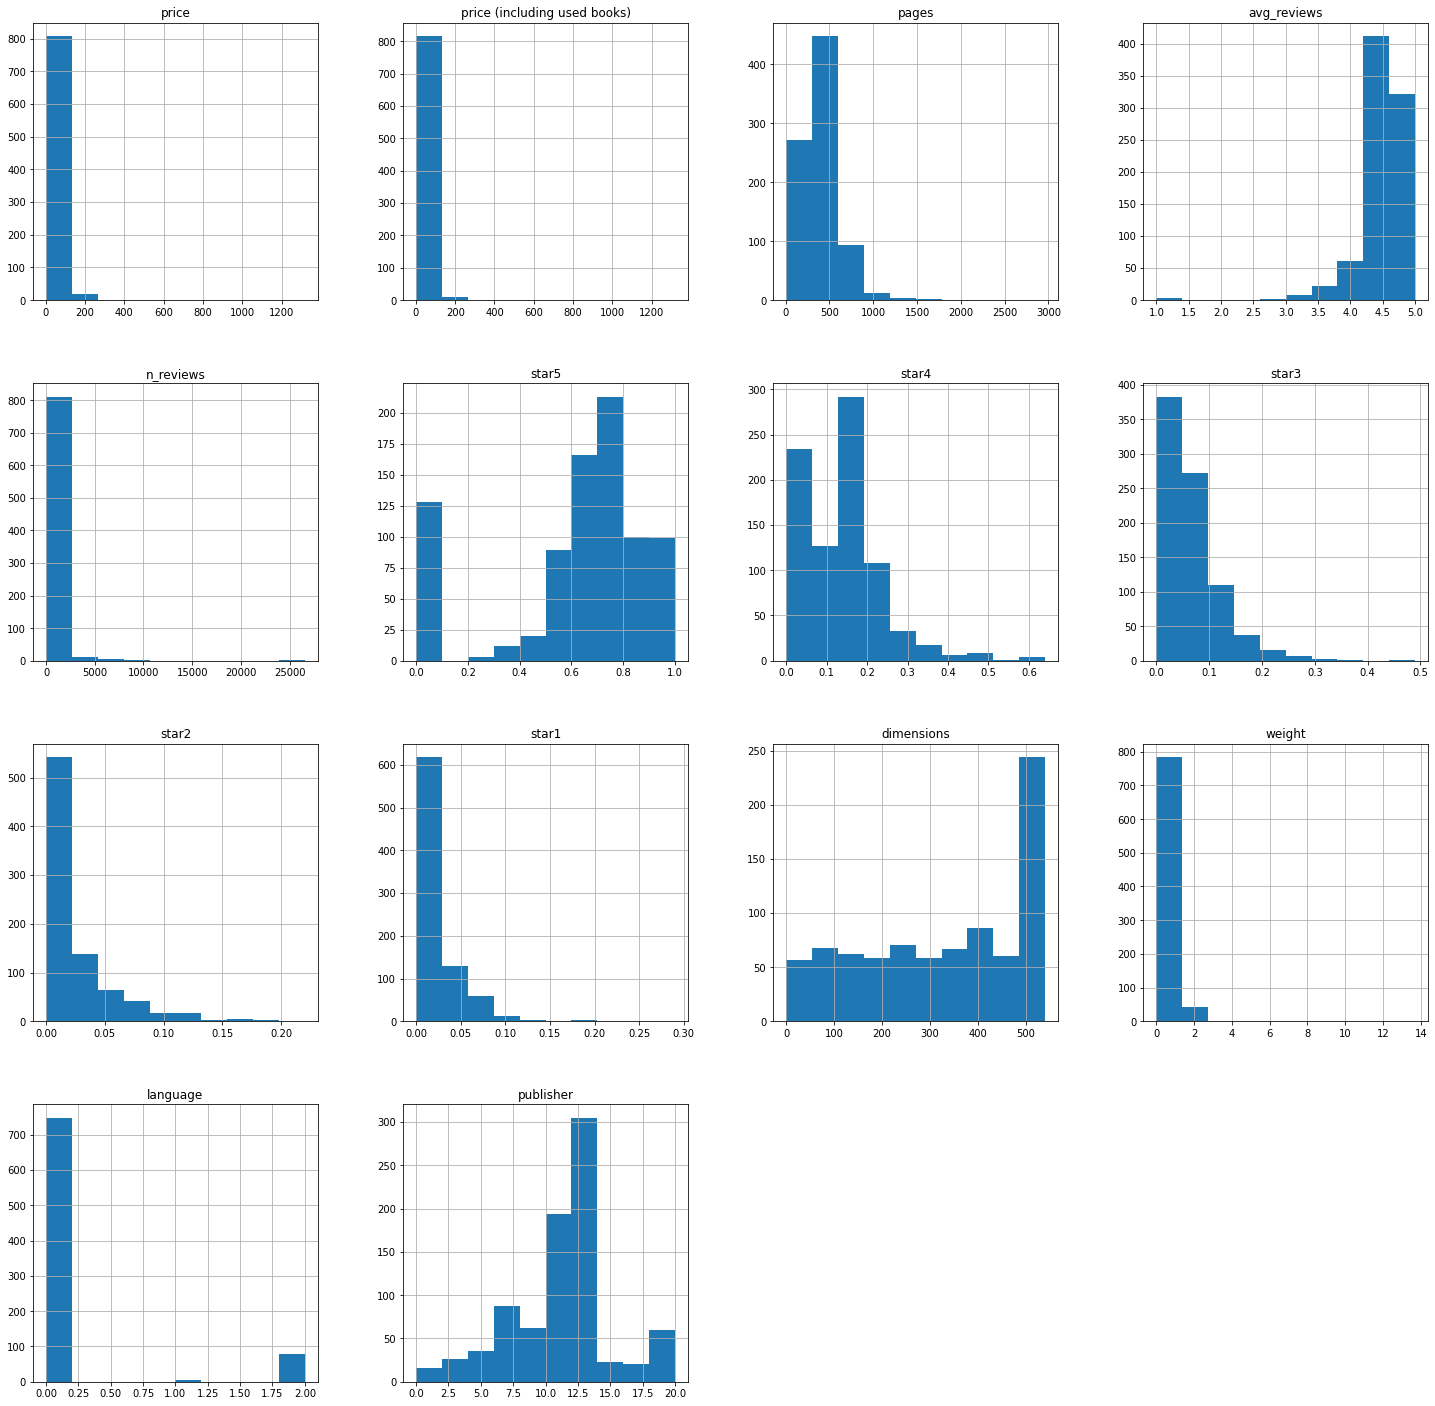

In [209]:
df.hist(figsize = (25,25))


In [210]:
df.describe(include='all')


,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
count,830.000000,830.000000,830.000000,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,46.491537,43.064896,391.803614,4.47208,275.549398,0.617024,0.130964,0.057783,0.023313,0.016687,332.297590,0.761354,0.192771,10.746988
std,59.025801,56.727149,224.975171,0.37666,1231.225332,0.296359,0.105583,0.061847,0.032662,0.029853,175.354143,0.749672,0.586495,4.014580
min,0.990000,0.990000,6.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000992,0.000000,0.000000
25%,24.992500,24.490000,256.000000,4.40000,5.000000,0.552500,0.042500,0.000000,0.000000,0.000000,180.250000,0.491014,0.000000,9.000000
50%,41.990000,39.990000,384.000000,4.50000,31.000000,0.700000,0.130000,0.050000,0.010000,0.000000,354.500000,0.761354,0.000000,11.000000
75%,49.990000,47.808750,469.500000,4.60000,134.250000,0.790000,0.190000,0.090000,0.030000,0.030000,519.750000,0.801724,0.000000,12.000000
max,1318.740000,1318.740000,2962.000000,5.00000,26560.000000,1.000000,0.640000,0.490000,0.220000,0.290000,540.000000,13.698487,2.000000,20.000000


#### Analizom gore prikazanog histograma moze se zakljuciti da bi bilo dobro odraditi normalizaciju podataka, tako da budu u rasponu vrednosti [-1, 1]

### Pomocne funkcije

In [211]:
def printClustersPCA(dataset_, model_, labels_):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset_.iloc[:, 0], dataset_.iloc[:, 1], dataset_.iloc[:, 2], 
            c=labels_, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


    ax.set_title("First three PCA directions")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.dist = 10

    ax.scatter(model_.cluster_centers_[:,0], model_.cluster_centers_[:,1], 
           model_.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

    plt.autoscale(enable=True, axis='x', tight=True)    

    plt.show()

In [212]:
def printClusters(dataset_, labels_, indices_=[0, 1, 2]):
    plt.figure(figsize = (12, 12))
    ax = plt.axes(projection='3d')
    for cluster in set(labels_):
        cluster_mask = [elem == cluster for elem in labels_]
        
        zdata = dataset_.iloc[cluster_mask, indices_[0]]
        xdata = dataset_.iloc[cluster_mask, indices_[1]]
        ydata = dataset_.iloc[cluster_mask, indices_[2]]
        ax.scatter3D(xdata, ydata, zdata)
        
        ax.set_xlabel(dataset_.columns[indices_[0]])
        ax.set_ylabel(dataset_.columns[indices_[1]])
        ax.set_zlabel(dataset_.columns[indices_[2]])

In [213]:
def printDataByClusters(dataset_, labels_):
    dataset_copy = dataset_.copy()
    dataset_copy['label'] = labels_

    df_mean = (dataset_copy.groupby('label').mean())
    results = pd.DataFrame(columns=['Variable', 'Var'])

    for column in df_mean.columns:
        results.loc[len(results), :] = [column, np.var(df_mean[column])]
        selected_columns = list(results.sort_values('Var', ascending=False).head(10).Variable.values)
    
    selected1 = []
    selected2 = []
    
    for col in selected_columns:
        if dataset_[col].max() > 1000:
            selected1.append(col)
        else:
            selected2.append(col)
    
    selected1.append("label")
    selected2.append("label")
    
    tidy1 = dataset_copy[selected1].melt(id_vars='label')
    tidy2 = dataset_copy[selected2].melt(id_vars='label')
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 7), squeeze=False)
    sn.barplot(x='label', y='value', hue='variable', data=tidy1, ax = axs[0][0])
    sn.barplot(x='label', y='value', hue='variable', data=tidy2, ax = axs[0][1])
    plt.tight_layout()    
    plt.show()

## Algoritmi

### Elbow method for determining the number of clusters

In [214]:
# df = df.drop(['dimensions'], axis=1)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'price (including used books)'}>,
        <AxesSubplot:title={'center':'pages'}>,
        <AxesSubplot:title={'center':'avg_reviews'}>],
       [<AxesSubplot:title={'center':'n_reviews'}>,
        <AxesSubplot:title={'center':'star5'}>,
        <AxesSubplot:title={'center':'star4'}>,
        <AxesSubplot:title={'center':'star3'}>],
       [<AxesSubplot:title={'center':'star2'}>,
        <AxesSubplot:title={'center':'star1'}>,
        <AxesSubplot:title={'center':'dimensions'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'language'}>,
        <AxesSubplot:title={'center':'publisher'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

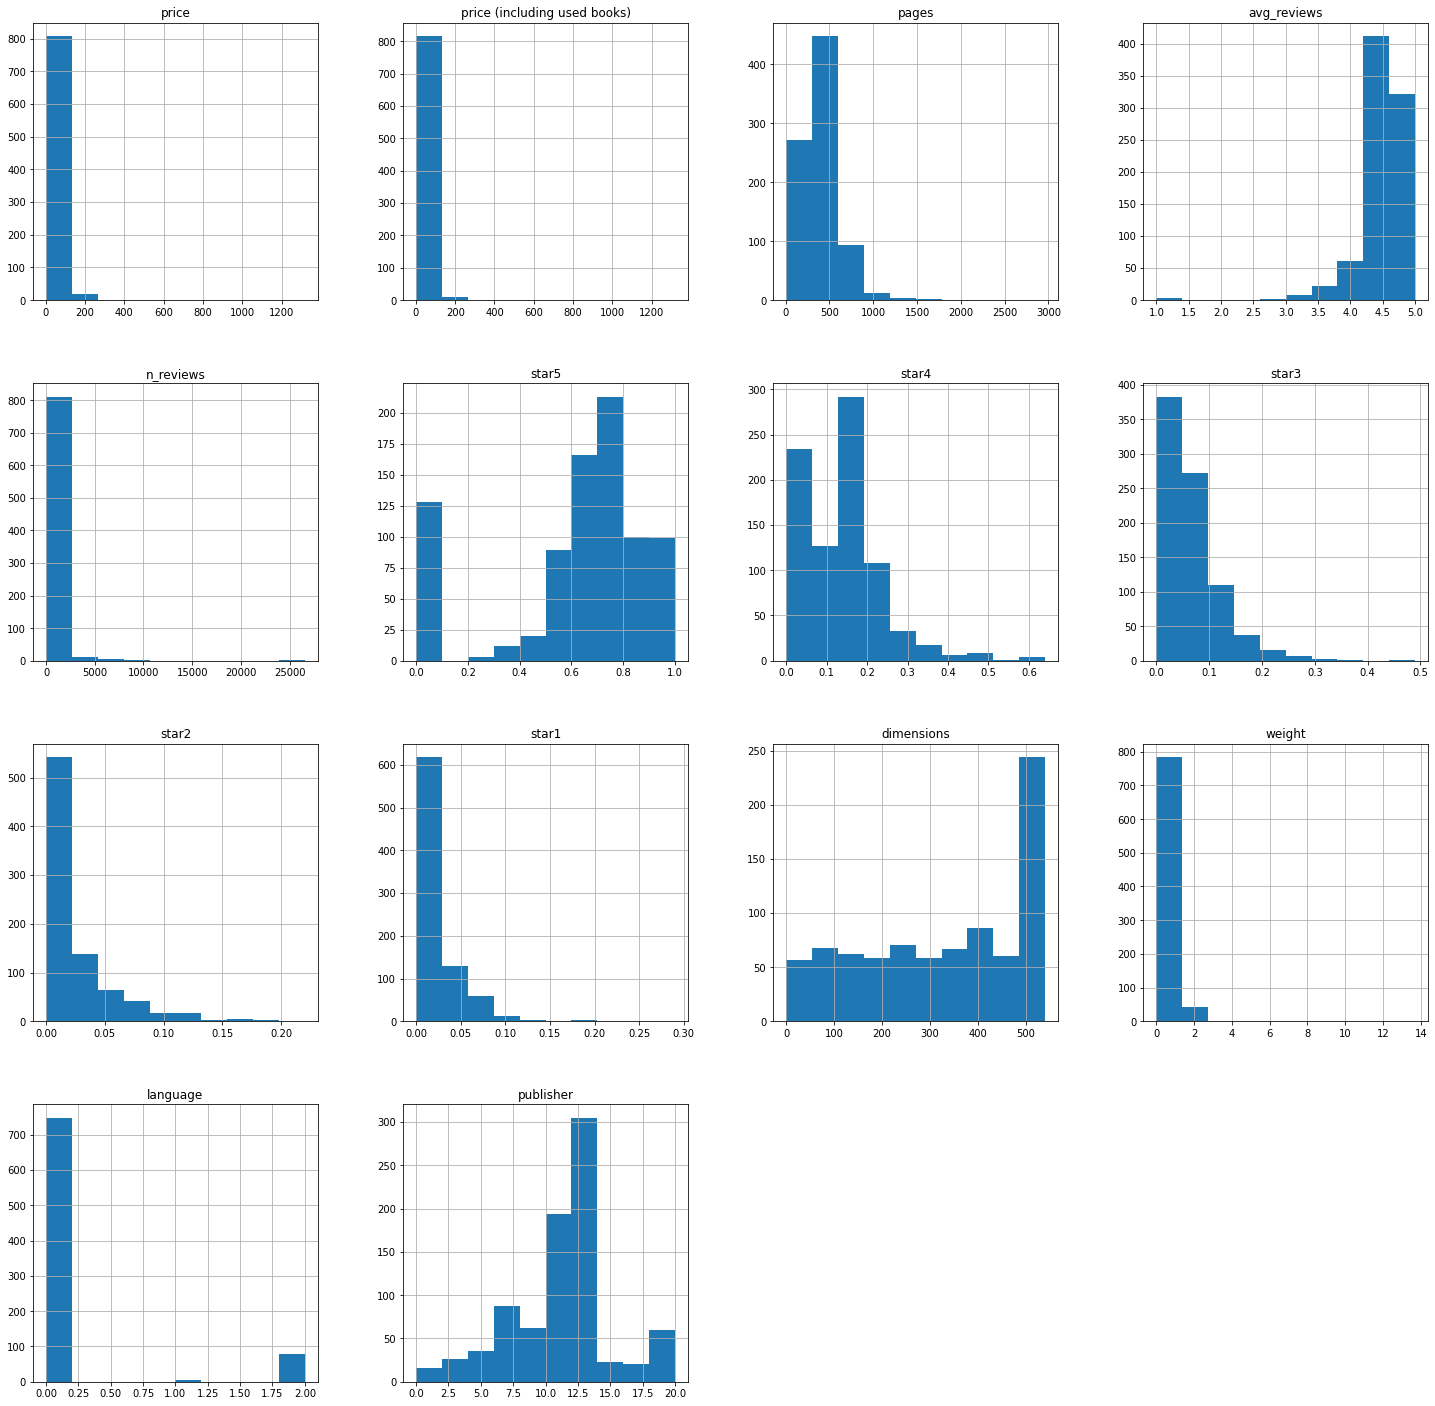

In [215]:
def scale_values(dataframe, scaler):
    scaled_vals = scaler.fit_transform(dataframe)
    df_scaled = pd.DataFrame(scaled_vals)
    df_scaled.rename(
        columns=dict(zip(df_scaled.columns.values.tolist(), dataframe.columns.values.tolist())),
        inplace=True
    )
    return df_scaled

x = df
min_max_scaler = MinMaxScaler()
df_scaled = scale_values(x, min_max_scaler)
df_scaled

df.hist(figsize = (25,25))

4


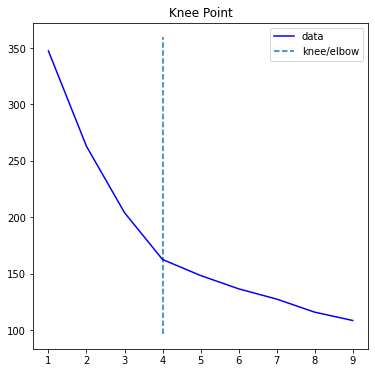

In [216]:
#elbow algorithm
distortions = []
df = df_scaled
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)
kl.plot_knee()

### KMeans algoritam

In [217]:
km_model = KMeans(n_clusters=num_clusters, random_state=10, algorithm="elkan")
km_labels = km_model.fit_predict(df)

print(km_labels)
print(len(km_labels))
print("Silhouette score: ", silhouette_score(df, km_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(df, km_labels))

[0 0 0 1 0 3 1 0 1 0 1 1 3 1 0 0 3 0 1 0 1 1 0 2 0 2 1 0 3 1 2 0 0 1 0 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 0 1 3 1 1 3 3 0 1 0 1 1 1 0 1 1 0 1 2 0 0 0 1 1 2
 1 0 0 1 3 0 1 1 0 1 0 1 2 2 1 0 0 1 0 1 1 0 0 2 0 1 0 2 1 2 0 0 0 1 2 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 2 2 0 1 0 1 1 1 0 1 2 3 0 1 0 3 0 0 0 0 1 1 2 0 1
 0 1 0 1 1 1 2 1 0 0 1 0 1 0 1 1 0 1 2 2 1 1 1 1 2 1 0 0 1 0 1 0 1 1 0 0 0
 2 0 0 0 1 1 2 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 2 3 0 0 0 1 0 0 0 2 0 0 0 1 0
 2 0 1 0 2 0 2 0 1 0 2 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 1 1 2 0 1 1 1 0 1 2 0 1 1 1 1 0 0 1 0 0 0 1 1 0 2 1 0 1 1 3 1 1 1 1 2
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 3 0 2 1 2 1 0 0 1 2 1 0 0 1 1 1 0 1 0 1 3 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 3 1 0 3 3 1 1 2 3 3 3 3 3 0 3 3 1 3 1 0 0 0 1 3 2 1 0 0 3
 2 0 1 3 0 2 1 1 0 0 1 0 2 3 1 0 0 3 1 0 2 2 2 2 0 1 1 1 0 0 0 0 2 1 1 1 3
 1 0 0 0 3 0 2 1 0 1 1 0 1 0 0 1 0 3 0 1 0 0 3 0 2 0 1 1 0 0 1 3 3 0 1 0 1
 1 1 2 1 2 2 0 0 0 0 3 3 

In [218]:
df.columns

Index(['price', 'price (including used books)', 'pages', 'avg_reviews',
       'n_reviews', 'star5', 'star4', 'star3', 'star2', 'star1', 'dimensions',
       'weight', 'language', 'publisher'],
      dtype='object')

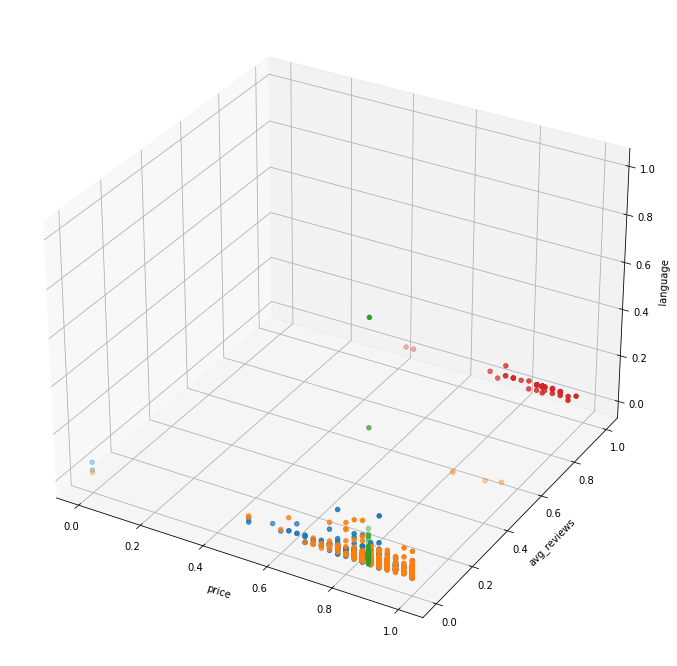

In [219]:
printClusters(df, km_labels, [0, 3, 12])

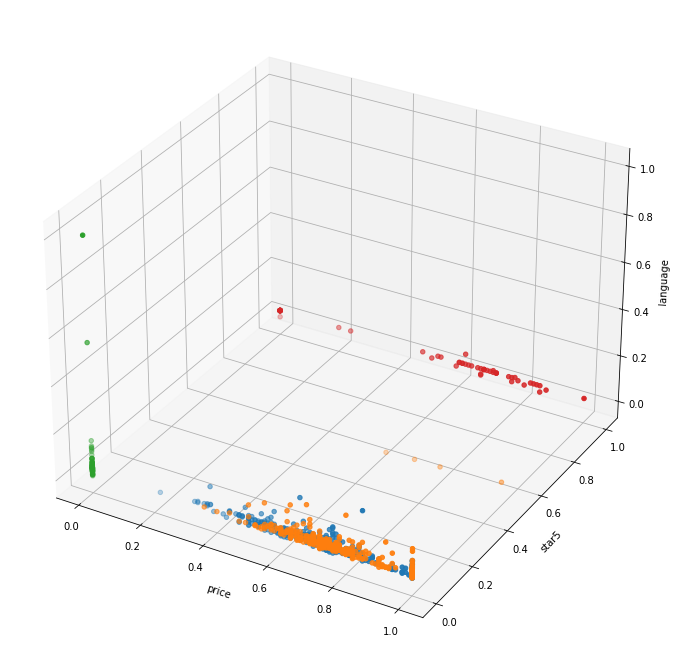

In [220]:
printClusters(df, km_labels, [0, 5, 12])

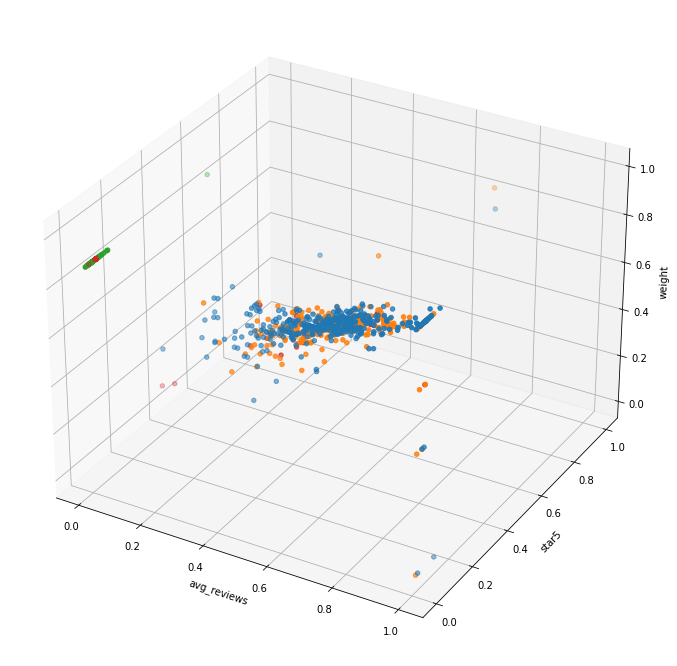

In [221]:
printClusters(df, km_labels, [3, 5, 11])

In [222]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].quantile(0.95))

Column: price
0.0750977044204136
Column: price (including used books)
0.06654050464807434
Column: pages
0.25679972936400536
Column: avg_reviews
1.0
Column: n_reviews
0.044252635542168614
Column: star5
1.0
Column: star4
0.46875
Column: star3
0.3581632653061215
Column: star2
0.4090909090909091
Column: star1
0.24137931034482762
Column: dimensions
1.0
Column: weight
0.10144153657818822
Column: language
1.0
Column: publisher
0.9


#### Detekcija outliera ako je normalna distribucija

In [223]:
for col in df.columns:
    highest_val = df[col].mean() + 3*df[col].std()
    lowest_val = df[col].mean() - 3*df[col].std()
    outliers =df[(df[col] > highest_val) | (df['price'] < lowest_val)]
    print(f'{col} outliers: {len(outliers)}')

price outliers: 5
price (including used books) outliers: 3
pages outliers: 8
avg_reviews outliers: 829
n_reviews outliers: 9
star5 outliers: 0
star4 outliers: 13
star3 outliers: 12
star2 outliers: 14
star1 outliers: 11
dimensions outliers: 0
weight outliers: 5
language outliers: 78
publisher outliers: 0


### Redukcija dimenzionalnosti

In [224]:
df

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,0.004371,0.004371,0.167118,0.85000,0.000866,0.55,0.609375,0.122449,0.000000,0.000000,0.964815,0.083708,0.0,0.60
1,0.024838,0.020197,0.161705,0.82500,0.004669,0.61,0.312500,0.183673,0.181818,0.206897,0.883333,0.064833,0.0,0.50
2,0.023586,0.023586,0.090663,0.92500,0.000377,0.87,0.203125,0.000000,0.000000,0.000000,0.905556,0.046289,0.0,0.60
3,0.040220,0.040220,0.183018,0.90000,0.063479,0.75,0.250000,0.102041,0.090909,0.068966,0.444444,0.048607,0.0,0.50
4,0.017833,0.017833,0.122463,0.72500,0.000452,0.52,0.265625,0.204082,0.454545,0.344828,0.622222,0.042977,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.003293,0.015898,0.068336,0.87500,0.002786,0.72,0.218750,0.142857,0.090909,0.137931,0.359259,0.032008,0.0,0.60
826,0.041123,0.040072,0.191813,0.87500,0.003502,0.78,0.109375,0.142857,0.181818,0.137931,0.227778,0.074436,0.0,0.90
827,0.033390,0.033390,0.095399,0.95000,0.000301,0.83,0.265625,0.000000,0.000000,0.000000,0.709259,0.036354,0.0,0.65
828,0.034530,0.031929,0.130244,0.86802,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.055511,1.0,0.55


Number of clusters: 4


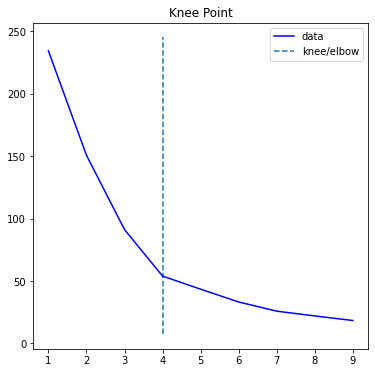

In [225]:
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(df)
principalComponents = pd.DataFrame(PCA_components)

distortions = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalComponents)
    
    # Append the inertia to the list of inertias
    distortions.append(model.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters_pca = kl.elbow
print("Number of clusters: " + str(num_clusters_pca))
kl.plot_knee()

[1 1 1 2 1 0 2 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 3 1 3 2 1 0 2 3 1 1 2 1 2 2
 2 1 2 2 1 2 1 2 2 2 2 1 1 2 0 2 2 0 0 1 2 1 2 2 2 1 2 2 1 2 3 1 1 1 2 2 3
 2 1 1 2 0 1 2 2 1 2 1 2 3 3 2 1 1 2 1 2 2 1 3 3 1 2 1 3 2 3 1 1 1 2 3 1 1
 1 2 1 1 1 1 1 1 1 2 2 1 3 3 1 2 1 2 2 2 1 2 3 0 1 2 1 0 1 1 1 1 2 2 3 1 2
 1 2 1 2 2 2 3 2 1 1 2 1 2 1 2 2 1 2 3 3 2 2 2 2 3 2 1 1 2 1 2 1 2 2 1 1 1
 3 1 1 1 2 2 3 1 2 1 2 2 1 2 1 1 1 2 2 2 1 2 3 0 1 1 1 2 1 1 1 3 1 1 1 2 1
 3 1 2 1 3 1 3 1 2 1 3 2 2 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1
 2 2 2 2 3 1 2 2 2 1 2 3 1 2 2 2 2 1 1 2 1 1 1 2 2 1 3 2 1 2 2 0 2 2 2 2 3
 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 0 1 3 2 3 2 1 1 2 3 2 1 1 2 2 2 1 2 1 2 0 1
 2 2 1 1 2 2 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 2 1 1 2 1 1 1
 1 2 1 2 1 1 2 2 0 2 1 0 0 2 2 3 0 0 0 0 0 1 0 0 2 0 2 1 1 1 2 0 3 2 1 1 0
 3 1 2 0 1 3 2 2 1 1 2 1 3 0 2 1 1 0 2 1 3 3 3 3 1 2 2 2 1 1 1 1 3 2 2 2 0
 2 1 1 1 0 1 3 2 1 2 2 1 2 1 1 2 1 0 1 2 1 1 0 1 3 1 2 2 1 1 2 0 0 1 2 1 2
 2 2 3 2 3 3 1 1 1 1 0 0 

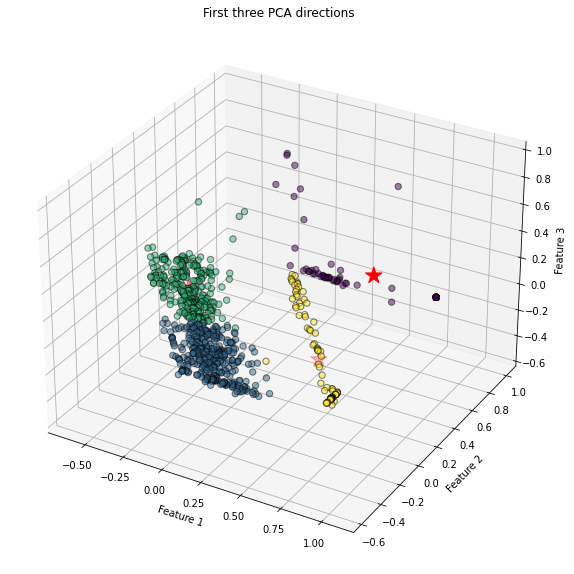

In [226]:
km_pca_model = KMeans(n_clusters=num_clusters_pca)
km_pca_labels = km_pca_model.fit_predict(principalComponents)

print(km_pca_labels)
print("Silhouette score: ", silhouette_score(principalComponents, km_pca_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, km_pca_labels))

printClustersPCA(principalComponents, km_pca_model, km_pca_labels)

### Agglomerative clustering

In [227]:
best_score = 0.0
best_ac_labels = None

for k in range(2, 8):
    ac_model = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    ac_labels = ac_model.fit_predict(df)
    
    sil_score = silhouette_score(df, ac_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_labels = ac_labels
    
    print("Clusters: ", k)
    print(ac_labels)
    print("Silhouette score: ", silhouette_score(df, ac_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(df, ac_labels))
    print("------------------------------------------")

Clusters:  2
[1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 1 0 0

In [228]:
df.columns

Index(['price', 'price (including used books)', 'pages', 'avg_reviews',
       'n_reviews', 'star5', 'star4', 'star3', 'star2', 'star1', 'dimensions',
       'weight', 'language', 'publisher'],
      dtype='object')

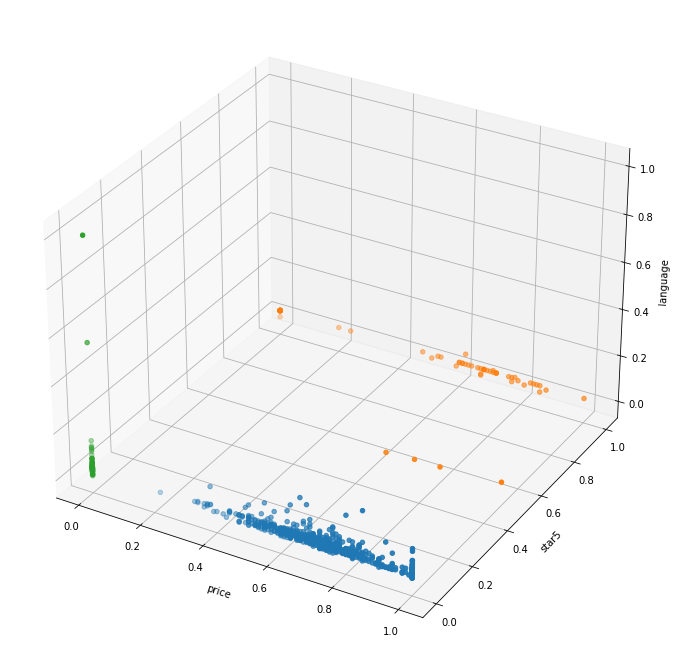

In [229]:
printClusters(df, best_ac_labels, [0,5 , 12])

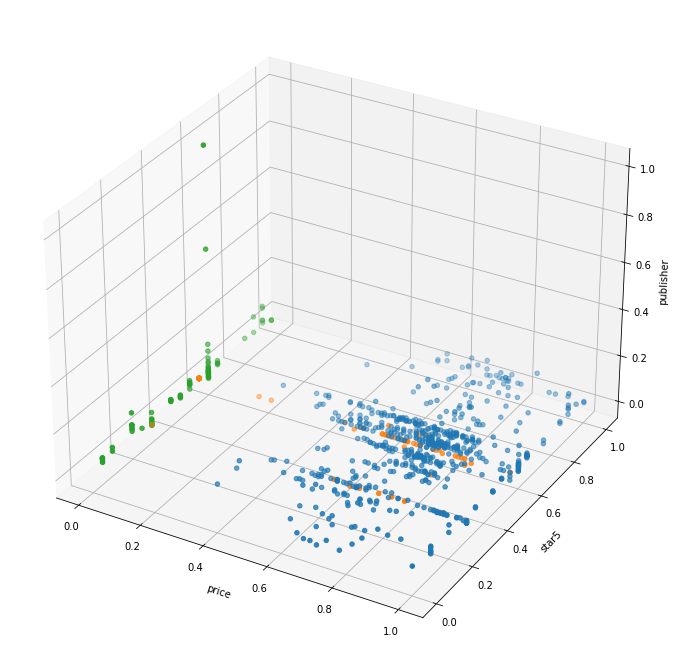

In [230]:
printClusters(df, best_ac_labels, [0,5 , 13])

ValueError: min() arg is an empty sequence

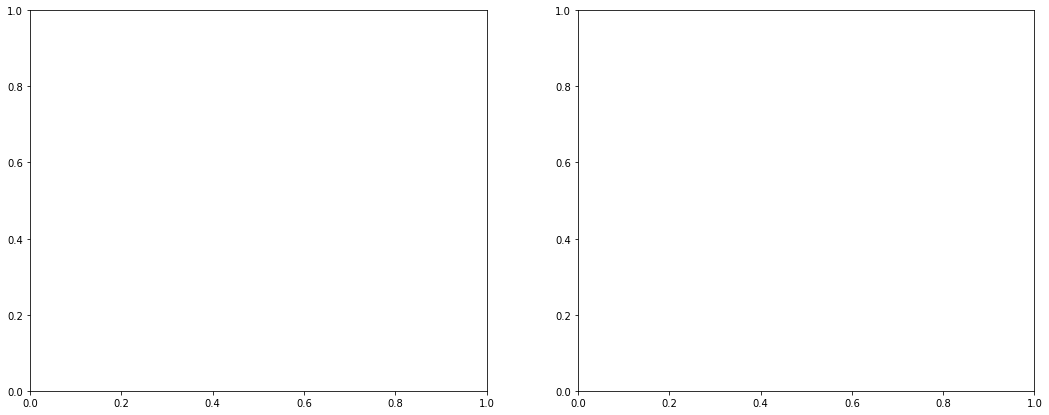

In [231]:
printDataByClusters(df, best_ac_labels)

In [232]:
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(df)
principalComponents = pd.DataFrame(PCA_components)

best_score = 0.0
best_ac_pca_labels = None

for k in range(2, 8):
    ac_pca_model = AgglomerativeClustering(n_clusters=k)
    ac_pca_labels = ac_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(df, ac_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_pca_labels = ac_pca_labels
    
    print("Clusters: ", k)
    print(ac_pca_labels)
    print("Silhouette score: ", silhouette_score(principalComponents, ac_pca_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, ac_pca_labels))
    print("------------------------------------------")

Clusters:  2
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

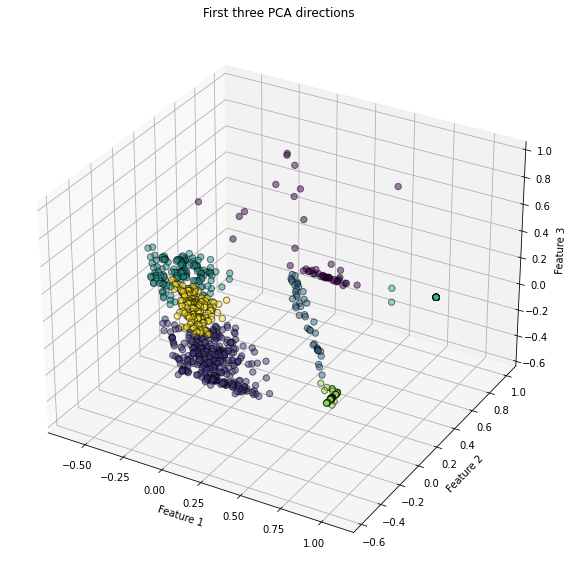

In [233]:
printClustersPCA(principalComponents, ac_pca_model, ac_pca_labels)

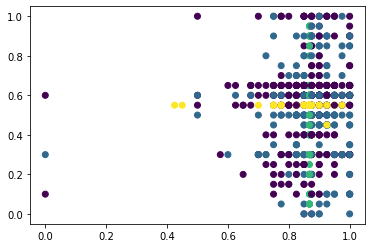

In [234]:
plt.scatter(df['avg_reviews'], df['publisher'], c=km_labels)
plt.show()

### Outlieri detekcija

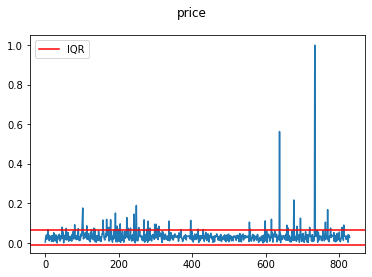

(array([  7,  46,  57,  80,  90, 100, 101, 102, 103, 113, 126, 132, 135,
       157, 167, 169, 173, 177, 178, 187, 191, 195, 198, 204, 222, 226,
       232, 242, 248, 254, 255, 269, 277, 280, 285, 298, 302, 304, 310,
       337, 369, 396, 416, 430, 556, 558, 599, 616, 638, 658, 661, 677,
       685, 686, 695, 720, 734, 763, 769, 777, 808, 813], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
7    0.067547                      0.067547  0.135995      0.92500   0.007718   
46   0.079681                      0.071933  0.241543      0.97500   0.000377   
57   0.073610                      0.070958  0.295670      0.92500   0.011182   
80   0.091823                      0.056528  0.133288      0.85000   0.002033   
90   0.072100                      0.072100  0.169147      1.00000   0.000113   
..        ...                           ...       ...          ...        ...   
763  0.105157                      0.105157  0.257781      0.86802   0.

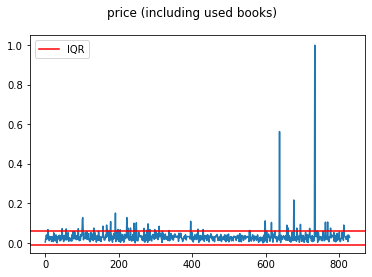

(array([  7,  46,  57,  90, 101, 102, 103, 132, 157, 167, 169, 177, 178,
       191, 198, 204, 222, 226, 232, 242, 248, 269, 277, 280, 285, 298,
       310, 337, 396, 416, 430, 556, 558, 599, 616, 638, 658, 661, 677,
       685, 695, 720, 734, 763, 769, 777, 813], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
7    0.067547                      0.067547  0.135995      0.92500   0.007718   
46   0.079681                      0.071933  0.241543      0.97500   0.000377   
57   0.073610                      0.070958  0.295670      0.92500   0.011182   
90   0.072100                      0.072100  0.169147      1.00000   0.000113   
101  0.121472                      0.120080  0.117050      0.86802   0.000000   
102  0.176521                      0.127964  0.349797      0.85000   0.000527   
103  0.075098                      0.075098  0.132950      0.86802   0.000000   
132  0.075128                      0.075128  0.238836      0.90000   0.0

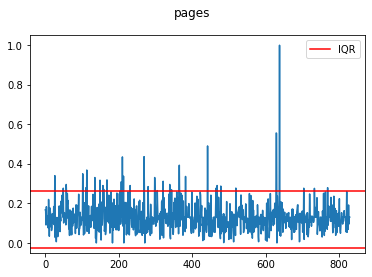

(array([ 26,  49,  57, 102, 111, 113, 135, 149, 157, 159, 168, 207, 210,
       213, 231, 269, 280, 298, 321, 339, 344, 365, 382, 442, 465, 468,
       478, 519, 629, 630, 638, 704, 733, 769], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
26   0.037943                      0.028272  0.340325      0.92500   0.006476   
49   0.025771                      0.025771  0.276725      1.00000   0.002372   
57   0.073610                      0.070958  0.295670      0.92500   0.011182   
102  0.176521                      0.127964  0.349797      0.85000   0.000527   
111  0.030734                      0.021161  0.279432      0.75000   0.000113   
113  0.086519                      0.056972  0.368742      0.87500   0.004480   
135  0.069937                      0.052085  0.330853      0.85000   0.006551   
149  0.010708                      0.010708  0.317321      0.87500   0.001995   
157  0.115735                      0.085088  0.290257      0.85

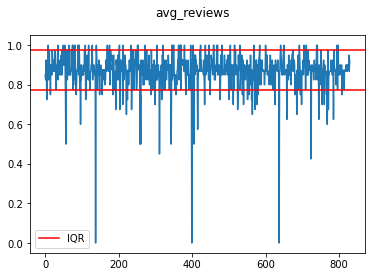

(array([  4,   8,  11,  14,  19,  27,  29,  34,  46,  49,  53,  55,  56,
        59,  64,  71,  74,  75,  76,  81,  84,  89,  90,  92,  94,  96,
       107, 109, 110, 111, 118, 122, 128, 137, 139, 142, 148, 155, 169,
       174, 175, 178, 184, 188, 192, 202, 203, 204, 211, 212, 221, 223,
       224, 233, 235, 237, 238, 240, 241, 246, 248, 249, 251, 252, 253,
       258, 259, 260, 272, 274, 276, 288, 289, 294, 299, 304, 311, 312,
       317, 318, 321, 322, 326, 338, 343, 345, 349, 350, 353, 356, 363,
       367, 368, 369, 370, 379, 383, 392, 396, 397, 399, 403, 405, 415,
       421, 423, 434, 436, 446, 449, 458, 459, 467, 469, 476, 481, 500,
       504, 506, 512, 514, 515, 516, 518, 524, 525, 530, 531, 537, 540,
       551, 555, 562, 564, 568, 571, 577, 580, 584, 600, 620, 626, 637,
       641, 649, 650, 658, 674, 680, 685, 687, 690, 692, 695, 698, 705,
       709, 711, 715, 724, 739, 740, 741, 745, 746, 751, 754, 760, 766,
       768, 770, 771, 785, 786, 795, 796, 797, 808, 810, 814], 

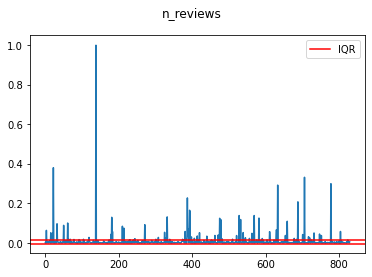

(array([  3,  15,  17,  20,  22,  32,  33,  50,  61,  63,  68,  78,  92,
       104, 118, 119, 131, 138, 174, 179, 181, 183, 210, 214, 229, 231,
       240, 244, 252, 271, 290, 301, 308, 325, 328, 329, 331, 332, 339,
       374, 376, 377, 381, 384, 386, 387, 388, 389, 390, 393, 394, 398,
       406, 413, 414, 420, 432, 440, 453, 462, 471, 475, 478, 480, 482,
       510, 521, 528, 532, 539, 545, 556, 563, 569, 575, 576, 582, 591,
       594, 604, 611, 612, 623, 629, 630, 631, 633, 654, 656, 659, 678,
       684, 688, 701, 706, 717, 720, 725, 732, 747, 752, 778, 804, 824],
      dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
3    0.040220                      0.040220  0.183018        0.900   0.063479   
15   0.018213                      0.018213  0.082206        0.900   0.051130   
17   0.007361                      0.007361  0.062923        0.900   0.014533   
20   0.022007                      0.022007  0.099797        0.925   0.050075

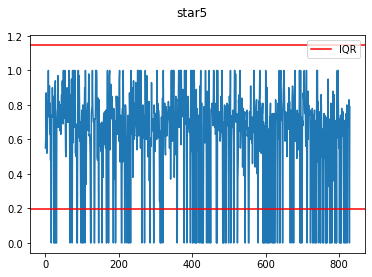

(array([ 16,  23,  25,  28,  30,  67,  73,  86,  87,  97, 101, 103, 108,
       123, 124, 133, 134, 145, 154, 166, 167, 172, 185, 191, 207, 208,
       216, 222, 226, 228, 232, 263, 270, 285, 295, 313, 315, 320, 359,
       378, 385, 395, 401, 402, 407, 410, 412, 419, 424, 427, 428, 429,
       430, 439, 443, 448, 450, 466, 468, 483, 485, 486, 491, 492, 499,
       505, 513, 523, 544, 553, 554, 579, 593, 595, 596, 599, 603, 606,
       608, 609, 614, 619, 621, 624, 625, 632, 638, 639, 646, 667, 671,
       676, 694, 696, 699, 713, 722, 728, 729, 734, 735, 738, 744, 749,
       750, 756, 757, 763, 765, 767, 774, 775, 776, 777, 780, 788, 791,
       793, 801, 803, 805, 806, 813, 816, 817, 818, 822, 828], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
16   0.034530                      0.031929  0.130244      0.86802        0.0   
23   0.051300                      0.051300  0.184032      0.86802        0.0   
25   0.022007                 

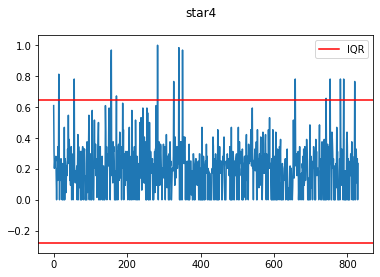

(array([ 14,  56, 156, 157, 171, 283, 327, 341, 351, 658, 742, 753, 781,
       790, 820], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
14   0.029596                      0.029596  0.152233        0.750   0.000151   
56   0.021977                      0.021977  0.091340        0.500   0.000075   
156  0.044773                      0.030548  0.122463        0.875   0.000075   
157  0.115735                      0.085088  0.290257        0.850   0.000113   
171  0.036388                      0.036388  0.106225        0.900   0.000377   
283  0.020573                      0.017500  0.068336        0.850   0.000113   
327  0.044773                      0.044773  0.152233        0.875   0.000075   
341  0.034530                      0.031929  0.020636        0.850   0.000113   
351  0.040341                      0.040247  0.122463        0.850   0.000113   
658  0.089714                      0.089714  0.135995        0.625   0.000075   
742

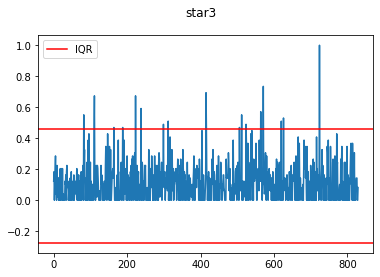

(array([ 82, 111, 164, 188, 223, 238, 299, 312, 415, 416, 506, 512, 524,
       564, 571, 620, 626, 724], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
82   0.034530                      0.031929  0.047700        0.800   0.000602   
111  0.030734                      0.021161  0.279432        0.750   0.000113   
164  0.034530                      0.031929  0.042287        0.825   0.000226   
188  0.029596                      0.029596  0.140054        0.775   0.000188   
223  0.035796                      0.035796  0.205007        0.750   0.000113   
238  0.038839                      0.025213  0.164073        0.775   0.000226   
299  0.027699                      0.027699  0.228687        0.700   0.000301   
312  0.034530                      0.031929  0.018945        0.750   0.001393   
415  0.043347                      0.043347  0.114682        0.575   0.000452   
416  0.069596                      0.069596  0.220907        0.825   

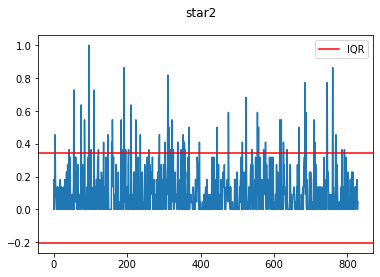

(array([  4,  42,  55,  75,  84,  96, 102, 110, 122, 136, 148, 158, 160,
       184, 189, 192, 196, 204, 211, 224, 236, 259, 288, 303, 311, 314,
       318, 322, 326, 338, 347, 353, 356, 358, 369, 397, 445, 476, 514,
       524, 525, 540, 555, 558, 572, 577, 616, 620, 626, 636, 668, 685,
       687, 709, 712, 745, 760, 768, 769, 785, 792], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
4    0.017833                      0.017833  0.122463        0.725   0.000452   
42   0.033390                      0.033314  0.110284        0.850   0.002861   
55   0.034530                      0.031929  0.130244        0.750   0.002184   
75   0.042762                      0.029979  0.089648        0.775   0.000602   
84   0.016316                      0.016316  0.192828        0.750   0.000715   
..        ...                           ...       ...          ...        ...   
760  0.010594                      0.010594  0.037889        0.700   0.00041

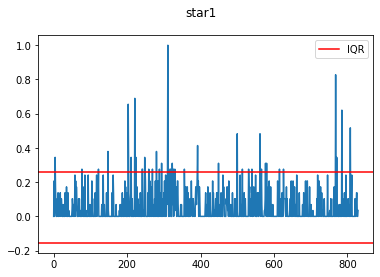

(array([  4,  77, 122, 148, 203, 204, 211, 221, 224, 241, 242, 248, 249,
       259, 269, 280, 288, 294, 311, 317, 318, 323, 326, 330, 356, 392,
       449, 500, 514, 531, 540, 562, 566, 577, 580, 615, 626, 768, 771,
       785, 808], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
4    0.017833                      0.017833  0.122463        0.725   0.000452   
77   0.020489                      0.020489  0.101488        0.825   0.002711   
122  0.005388                      0.005388  0.130244        0.775   0.000715   
148  0.025802                      0.025802  0.106901        0.750   0.001242   
203  0.007323                      0.007323  0.203654        0.675   0.000828   
204  0.096369                      0.066238  0.263194        0.750   0.002748   
211  0.031652                      0.031652  0.182003        0.700   0.000452   
221  0.034530                      0.031929  0.040595        0.650   0.002937   
224  0.025771        

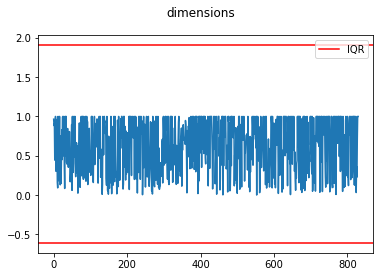

(array([], dtype=int64),)
Empty DataFrame
Columns: [price, price (including used books), pages, avg_reviews, n_reviews, star5, star4, star3, star2, star1, dimensions, weight, language, publisher]
Index: []
-------------------------------------------------


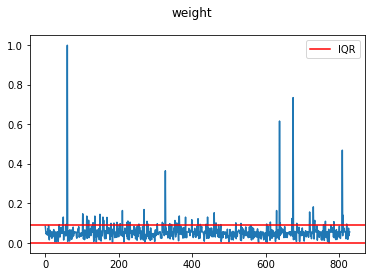

(array([ 38,  49,  57,  60, 102, 113, 118, 130, 135, 149, 157, 159, 168,
       179, 187, 195, 204, 210, 223, 225, 231, 255, 269, 277, 280, 305,
       319, 321, 327, 339, 344, 353, 358, 360, 364, 365, 382, 399, 416,
       422, 438, 442, 460, 465, 478, 519, 533, 603, 613, 630, 638, 640,
       672, 675, 685, 720, 730, 733, 734, 763, 773, 786, 809, 811, 821],
      dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
38   0.044174                      0.038972  0.187077        0.850   0.000979   
49   0.025771                      0.025771  0.276725        1.000   0.002372   
57   0.073610                      0.070958  0.295670        0.925   0.011182   
60   0.053819                      0.039567  0.250000        0.825   0.001581   
102  0.176521                      0.127964  0.349797        0.850   0.000527   
..        ...                           ...       ...          ...        ...   
773  0.005889                      0.005889  0.135

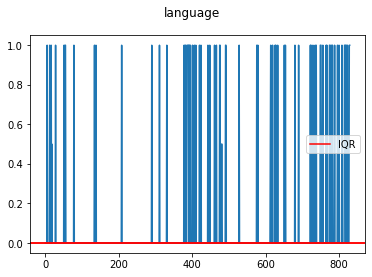

(array([  5,  12,  16,  18,  28,  51,  54,  55,  78, 134, 138, 208, 290,
       311, 331, 378, 381, 382, 386, 387, 388, 389, 390, 392, 393, 395,
       401, 406, 410, 420, 424, 443, 448, 461, 466, 475, 476, 480, 481,
       491, 492, 528, 576, 579, 613, 614, 619, 626, 628, 633, 651, 654,
       680, 690, 722, 724, 729, 735, 738, 749, 750, 751, 756, 765, 767,
       774, 775, 776, 780, 782, 788, 796, 800, 808, 815, 816, 817, 818,
       820, 823, 828, 829], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
5    0.034530                      0.031929  0.130244      0.80000   0.001167   
12   0.034530                      0.031929  0.130244      0.85000   0.010994   
16   0.034530                      0.031929  0.130244      0.86802   0.000000   
18   0.013956                      0.013956  0.077131      0.85000   0.002108   
28   0.034530                      0.031929  0.130244      0.86802   0.000000   
..        ...                         

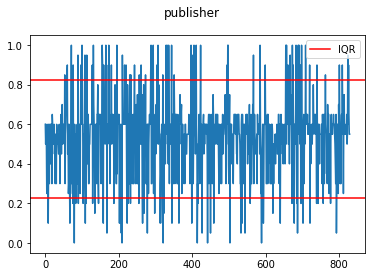

(array([  8,  53,  59,  60,  67,  71,  75,  76,  79,  83,  89,  90,  97,
        99, 100, 103, 108, 109, 111, 113, 128, 129, 131, 135, 145, 155,
       156, 157, 158, 159, 165, 167, 168, 173, 180, 187, 195, 202, 204,
       207, 209, 210, 216, 220, 222, 223, 226, 230, 232, 233, 243, 255,
       256, 261, 265, 269, 273, 278, 287, 288, 292, 294, 298, 304, 307,
       313, 319, 320, 321, 323, 329, 332, 336, 344, 345, 351, 364, 397,
       399, 402, 405, 411, 414, 416, 423, 427, 442, 450, 459, 495, 497,
       498, 503, 533, 536, 544, 558, 567, 585, 589, 594, 599, 620, 640,
       655, 657, 661, 667, 672, 673, 675, 678, 683, 685, 687, 689, 691,
       695, 696, 697, 698, 702, 709, 720, 721, 739, 740, 743, 757, 763,
       777, 793, 801, 809, 824, 826], dtype=int64),)
        price  price (including used books)     pages  avg_reviews  n_reviews  \
8    0.040372                      0.040292  0.075778      1.00000   0.000188   
53   0.038869                      0.038581  0.127876      1.000

In [251]:
for i in list(df[2:]):
    feature = df[i]
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    plt.figure()
    plt.suptitle(i)
    plt.plot(feature)
    plt.axhline(y=lower_bound, color='r', linestyle='-', label = "IQR")
    plt.axhline(y=upper_bound, color='r', linestyle='-')
    plt.legend()
    plt.show()
        
    outliers = np.where((feature > upper_bound) | (feature < lower_bound))
    
    print(outliers)
    print(df.iloc[outliers[0]])
    print("-------------------------------------------------")

# Analiza rezultata - Trazenje FEATURE IMPORTANCE-a

In [252]:

#km_pca_model = KMeans(n_clusters=num_clusters_pca)
#km_pca_labels = km_pca_model.fit_predict(principalComponents)

#print(km_pca_labels)
#print("Silhouette score: ", silhouette_score(principalComponents, km_pca_labels))
#print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, km_pca_labels))

#printClustersPCA(principalComponents, km_pca_model, km_pca_labels)

df_pca_km4 = df.copy()
df_pca_km4['pca_km_labels'] = km_pca_labels

In [253]:
df_pca_km4['pca_km_labels']

0      1
1      1
2      1
3      2
4      1
      ..
825    2
826    2
827    1
828    0
829    0
Name: pca_km_labels, Length: 830, dtype: int32

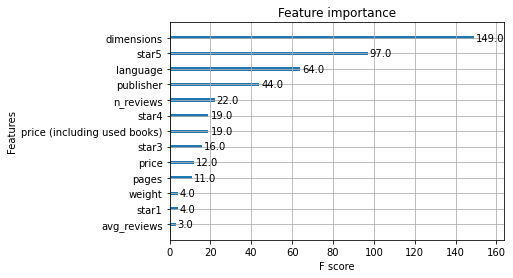

In [254]:
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

y_col = 'pca_km_labels'
y = df_pca_km4[y_col]
X = df_pca_km4[df_pca_km4.columns.drop(y_col)]

#X,y = make_classification(random_state=68)
xgb = XGBClassifier()
xgb.fit(X, y)
plot_importance(xgb)
plt.show()

In [255]:
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier

In [257]:
dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
X = df.copy()
y = pd.DataFrame(y, columns = ['pca_km_labels'])                               
#dt_viz.fit(X, y)
#tree_viz1 = dtreeviz(dt_viz, X, y, target_name='Churn', feature_names= X.columns, class_names=['1', '2', '3', '4'])

In [258]:
X

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,0.004371,0.004371,0.167118,0.85000,0.000866,0.55,0.609375,0.122449,0.000000,0.000000,0.964815,0.083708,0.0,0.60
1,0.024838,0.020197,0.161705,0.82500,0.004669,0.61,0.312500,0.183673,0.181818,0.206897,0.883333,0.064833,0.0,0.50
2,0.023586,0.023586,0.090663,0.92500,0.000377,0.87,0.203125,0.000000,0.000000,0.000000,0.905556,0.046289,0.0,0.60
3,0.040220,0.040220,0.183018,0.90000,0.063479,0.75,0.250000,0.102041,0.090909,0.068966,0.444444,0.048607,0.0,0.50
4,0.017833,0.017833,0.122463,0.72500,0.000452,0.52,0.265625,0.204082,0.454545,0.344828,0.622222,0.042977,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.003293,0.015898,0.068336,0.87500,0.002786,0.72,0.218750,0.142857,0.090909,0.137931,0.359259,0.032008,0.0,0.60
826,0.041123,0.040072,0.191813,0.87500,0.003502,0.78,0.109375,0.142857,0.181818,0.137931,0.227778,0.074436,0.0,0.90
827,0.033390,0.033390,0.095399,0.95000,0.000301,0.83,0.265625,0.000000,0.000000,0.000000,0.709259,0.036354,0.0,0.65
828,0.034530,0.031929,0.130244,0.86802,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.055511,1.0,0.55


In [259]:
df_pca_km4

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,pca_km_labels
0,0.004371,0.004371,0.167118,0.85000,0.000866,0.55,0.609375,0.122449,0.000000,0.000000,0.964815,0.083708,0.0,0.60,1
1,0.024838,0.020197,0.161705,0.82500,0.004669,0.61,0.312500,0.183673,0.181818,0.206897,0.883333,0.064833,0.0,0.50,1
2,0.023586,0.023586,0.090663,0.92500,0.000377,0.87,0.203125,0.000000,0.000000,0.000000,0.905556,0.046289,0.0,0.60,1
3,0.040220,0.040220,0.183018,0.90000,0.063479,0.75,0.250000,0.102041,0.090909,0.068966,0.444444,0.048607,0.0,0.50,2
4,0.017833,0.017833,0.122463,0.72500,0.000452,0.52,0.265625,0.204082,0.454545,0.344828,0.622222,0.042977,0.0,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.003293,0.015898,0.068336,0.87500,0.002786,0.72,0.218750,0.142857,0.090909,0.137931,0.359259,0.032008,0.0,0.60,2
826,0.041123,0.040072,0.191813,0.87500,0.003502,0.78,0.109375,0.142857,0.181818,0.137931,0.227778,0.074436,0.0,0.90,2
827,0.033390,0.033390,0.095399,0.95000,0.000301,0.83,0.265625,0.000000,0.000000,0.000000,0.709259,0.036354,0.0,0.65,1
828,0.034530,0.031929,0.130244,0.86802,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.055511,1.0,0.55,0


[INFO]:  4 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  4.64516544342041  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0024096385542168677
MSE:  0.0012048192771084338
RMSE:  0.03471050672503117
RAE:  0.020319495952707323
RRSE:  0.04258216279882877
Mean:  1.5012048192771084
MAE / Mean:  0.1605136436597111 %
RMSE / Mean:  2.312176611699508 %
Decision rule:  outputs/rules/rules.py


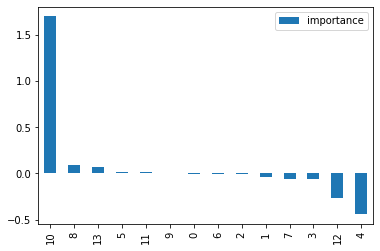

In [260]:
from chefboost import Chefboost as cb
%matplotlib inline

config = {'algorithm':'C4.5', 'enableParallelism':True}
model = cb.fit(df_pca_km4, config, target_label = 'pca_km_labels')

fi = cb.feature_importance(rules="outputs/rules/rules.py")
fi.plot.bar()
plt.show()

In [246]:
## 5 - star5, 10 - dimensions, 12 - publisher

In [264]:
X

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,0.004371,0.004371,0.167118,0.85000,0.000866,0.55,0.609375,0.122449,0.000000,0.000000,0.964815,0.083708,0.0,0.60
1,0.024838,0.020197,0.161705,0.82500,0.004669,0.61,0.312500,0.183673,0.181818,0.206897,0.883333,0.064833,0.0,0.50
2,0.023586,0.023586,0.090663,0.92500,0.000377,0.87,0.203125,0.000000,0.000000,0.000000,0.905556,0.046289,0.0,0.60
3,0.040220,0.040220,0.183018,0.90000,0.063479,0.75,0.250000,0.102041,0.090909,0.068966,0.444444,0.048607,0.0,0.50
4,0.017833,0.017833,0.122463,0.72500,0.000452,0.52,0.265625,0.204082,0.454545,0.344828,0.622222,0.042977,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.003293,0.015898,0.068336,0.87500,0.002786,0.72,0.218750,0.142857,0.090909,0.137931,0.359259,0.032008,0.0,0.60
826,0.041123,0.040072,0.191813,0.87500,0.003502,0.78,0.109375,0.142857,0.181818,0.137931,0.227778,0.074436,0.0,0.90
827,0.033390,0.033390,0.095399,0.95000,0.000301,0.83,0.265625,0.000000,0.000000,0.000000,0.709259,0.036354,0.0,0.65
828,0.034530,0.031929,0.130244,0.86802,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.055511,1.0,0.55


# Feature importances - Decision tree

Feature: 0, Score: 0.00060
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00303
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.29202
Feature: 6, Score: 0.00682
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.48085
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.21669
Feature: 13, Score: 0.00000


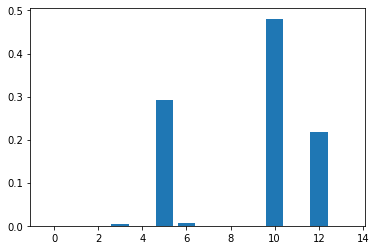

In [261]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random forest

C:\Users\nikol\AppData\Local\Temp/ipykernel_7436/2349367404.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature: 0, Score: 0.01904
Feature: 1, Score: 0.01766
Feature: 2, Score: 0.02958
Feature: 3, Score: 0.02219
Feature: 4, Score: 0.07844
Feature: 5, Score: 0.12184
Feature: 6, Score: 0.02976
Feature: 7, Score: 0.01418
Feature: 8, Score: 0.00683
Feature: 9, Score: 0.00435
Feature: 10, Score: 0.44479
Feature: 11, Score: 0.03526
Feature: 12, Score: 0.13496
Feature: 13, Score: 0.04113


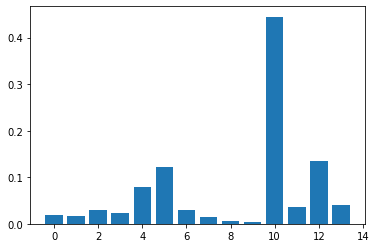

In [265]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBoost

Feature: 0, Score: 0.00446
Feature: 1, Score: 0.00179
Feature: 2, Score: 0.02021
Feature: 3, Score: 0.00245
Feature: 4, Score: 0.15271
Feature: 5, Score: 0.20465
Feature: 6, Score: 0.00092
Feature: 7, Score: 0.00038
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00305
Feature: 10, Score: 0.27490
Feature: 11, Score: 0.00551
Feature: 12, Score: 0.32173
Feature: 13, Score: 0.00726


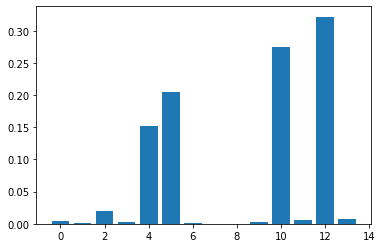

In [266]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

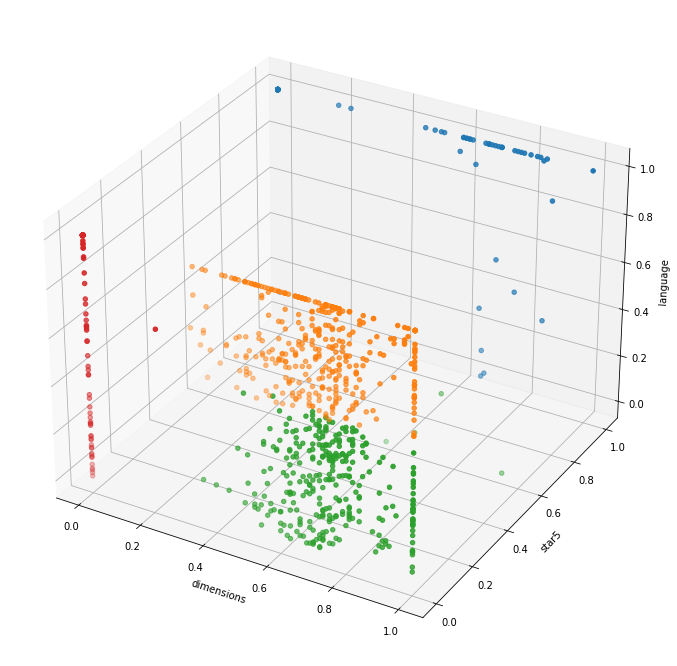

In [267]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [10, 5, 12])

## Feature importance bez dimensions

Number of clusters: 3
[1 1 0 0 0 2 0 0 0 0 1 0 2 1 1 1 2 1 0 0 1 0 0 3 1 3 0 0 2 1 3 1 1 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 1 0 1 2 0 1 2 2 1 1 1 1 1 0 1 0 0 1 0 3 0 0 1 1 0 3
 0 0 1 0 2 0 1 0 1 0 0 1 3 3 0 1 0 1 0 1 1 0 1 3 1 1 1 3 1 3 0 1 0 1 3 0 1
 3 0 1 1 0 1 1 0 0 1 1 1 3 3 1 1 1 1 0 1 1 1 3 2 0 1 0 2 0 0 1 1 1 0 3 1 1
 1 1 1 0 0 1 3 1 1 0 0 1 1 1 1 1 1 1 3 3 0 0 0 1 3 1 0 0 0 1 0 1 1 0 1 1 1
 3 1 0 1 0 1 3 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 3 2 0 1 1 0 1 1 1 3 1 1 1 1 1
 3 3 1 1 3 1 3 0 1 1 3 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 1 0 1 1 3 0 0 1 1 1 0 3 1 0 1 0 0 0 1 0 1 1 0 0 1 1 3 1 1 1 0 2 1 1 1 1 3
 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 2 1 3 0 3 0 1 1 0 3 0 1 0 1 0 1 1 1 1 1 2 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 3 0 1 0 0 0 1 1 1 0 1
 0 1 0 0 1 0 0 0 2 0 0 2 2 0 0 3 2 2 2 2 2 1 2 2 0 2 0 1 1 0 0 2 3 0 1 1 2
 3 1 0 2 1 3 0 0 0 0 0 1 3 2 0 1 1 2 0 1 3 3 3 3 1 0 1 1 1 0 1 1 3 0 0 0 2
 1 1 0 1 2 1 3 0 1 0 1 0 0 1 0 0 0 2 1 1 1 1 2 0 3 0 1 1 0 0 1 2 2 1 0 1 0
 0 

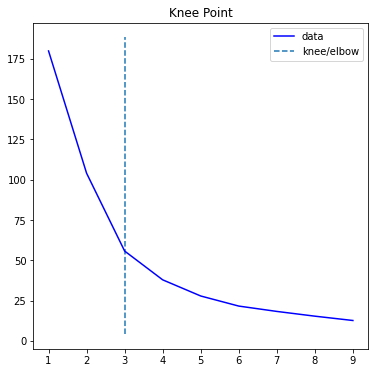

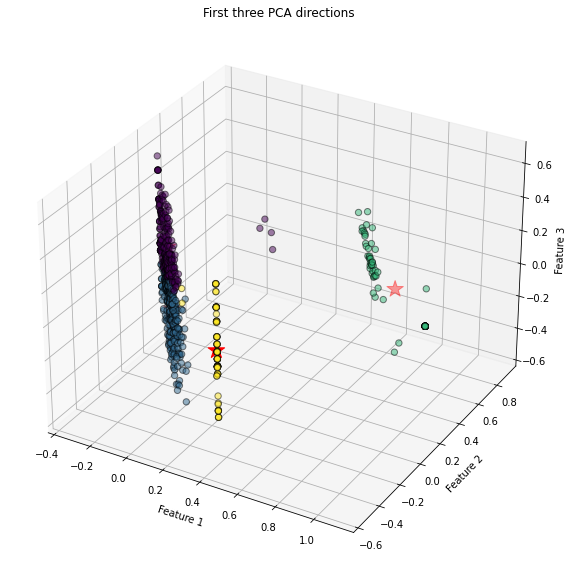

In [269]:
pca = PCA(n_components=3)
df_no_dimensions = df.drop(['dimensions'], axis=1)
PCA_components = pca.fit_transform(df_no_dimensions)
principalComponents = pd.DataFrame(PCA_components)

distortions = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalComponents)
    
    # Append the inertia to the list of inertias
    distortions.append(model.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters_pca = kl.elbow
print("Number of clusters: " + str(num_clusters_pca))
kl.plot_knee()
#####################################
num_clusters_pca = 4
#####################################
km_pca_model = KMeans(n_clusters=num_clusters_pca)
km_pca_labels = km_pca_model.fit_predict(principalComponents)

print(km_pca_labels)
print("Silhouette score: ", silhouette_score(principalComponents, km_pca_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, km_pca_labels))

printClustersPCA(principalComponents, km_pca_model, km_pca_labels)

df_pca_km4 = df_no_dimensions.copy()
df_pca_km4['pca_km_labels'] = km_pca_labels

y_col = 'pca_km_labels'
y = df_pca_km4[y_col]
X = df_pca_km4[df_pca_km4.columns.drop(y_col)]

dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
X = df_no_dimensions.copy()
y = pd.DataFrame(y, columns = ['pca_km_labels'])                               
#dt_viz.fit(X, y)
#tree_viz1 = dtreeviz(dt_viz, X, y, target_name='Churn', feature_names= X.columns, class_names=['1', '2', '3', '4'])

## Decision tree

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00110
Feature: 2, Score: 0.00228
Feature: 3, Score: 0.00175
Feature: 4, Score: 0.00996
Feature: 5, Score: 0.43386
Feature: 6, Score: 0.01425
Feature: 7, Score: 0.00361
Feature: 8, Score: 0.00184
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.20561
Feature: 12, Score: 0.32574


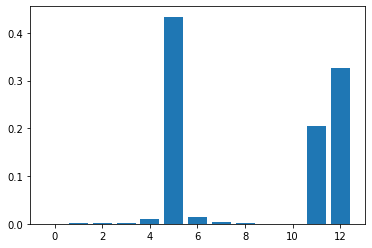

In [270]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [162]:
# 5-star5, 9-star1, 11-language

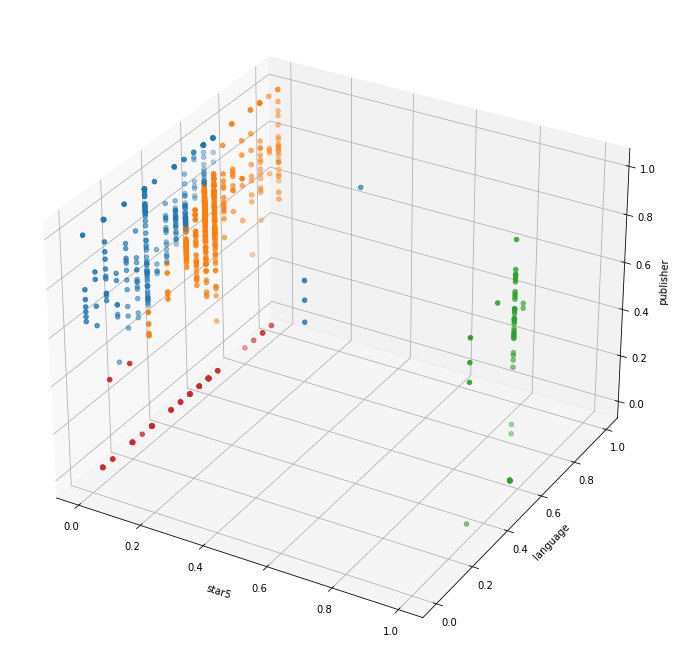

In [271]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [5, 11, 12])

## Random forest

C:\Users\nikol\AppData\Local\Temp/ipykernel_7436/2349367404.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature: 0, Score: 0.02851
Feature: 1, Score: 0.03042
Feature: 2, Score: 0.03314
Feature: 3, Score: 0.04344
Feature: 4, Score: 0.11592
Feature: 5, Score: 0.14865
Feature: 6, Score: 0.06618
Feature: 7, Score: 0.03059
Feature: 8, Score: 0.01830
Feature: 9, Score: 0.00816
Feature: 10, Score: 0.02649
Feature: 11, Score: 0.13575
Feature: 12, Score: 0.31446


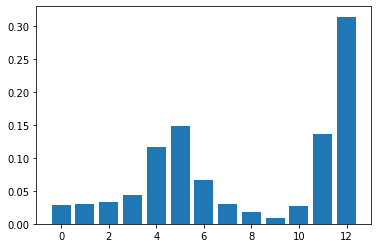

In [272]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

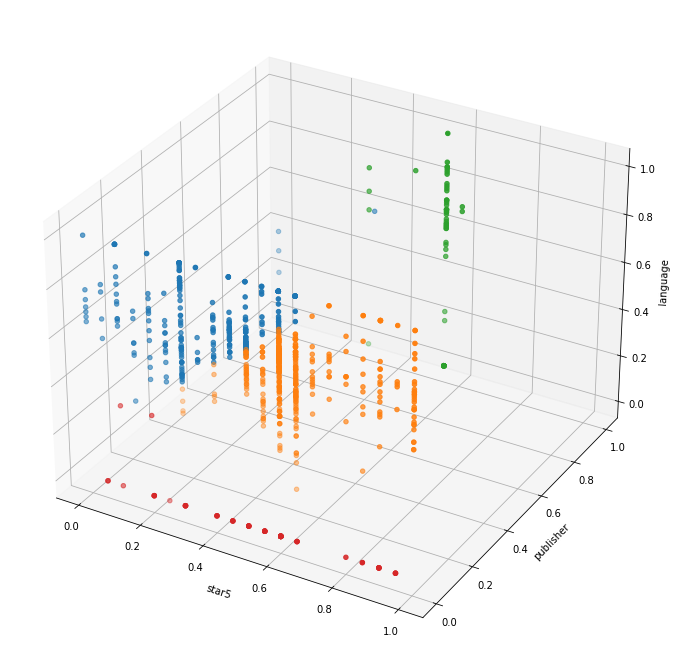

In [274]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [5, 12, 11])

## XGBoost

Feature: 0, Score: 0.00365
Feature: 1, Score: 0.00174
Feature: 2, Score: 0.01394
Feature: 3, Score: 0.00949
Feature: 4, Score: 0.07672
Feature: 5, Score: 0.14437
Feature: 6, Score: 0.09953
Feature: 7, Score: 0.01216
Feature: 8, Score: 0.02591
Feature: 9, Score: 0.00621
Feature: 10, Score: 0.00488
Feature: 11, Score: 0.43902
Feature: 12, Score: 0.16240


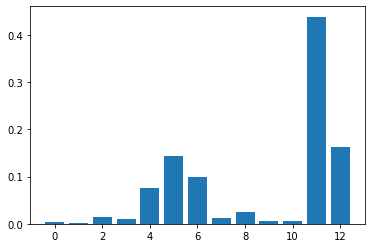

In [275]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

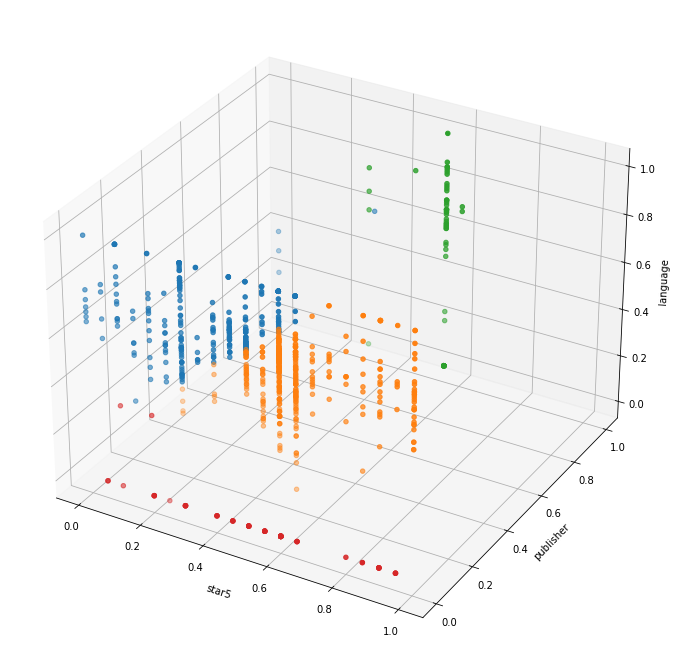

In [276]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [5, 12, 11])

## Bez dimensions sa 3 klastera

Number of clusters: 3
[0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 2 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 1 2 2 2 2 2 0 2 2 0 2 0 0 0 0 0 2 1 0 0 0 2
 1 0 0 2 0 1 0 0 0 0 0 0 1 2 0 0 0 2 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 0 0 0 0 0 2 2 0 0 0 0
 0 

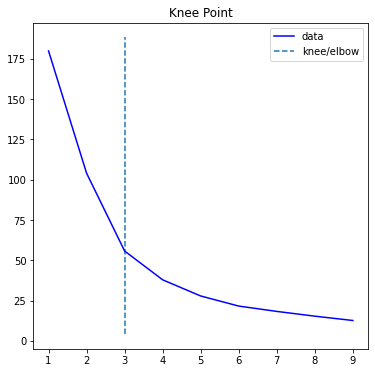

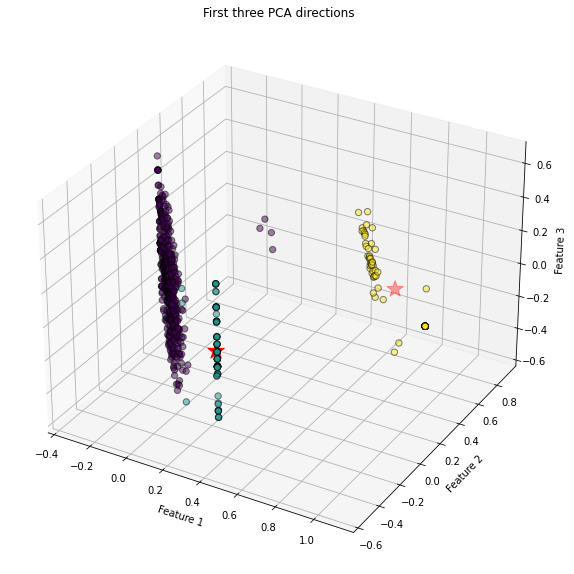

In [277]:
pca = PCA(n_components=3)
df_no_dimensions = df.drop(['dimensions'], axis=1)
PCA_components = pca.fit_transform(df_no_dimensions)
principalComponents = pd.DataFrame(PCA_components)

distortions = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalComponents)
    
    # Append the inertia to the list of inertias
    distortions.append(model.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters_pca = kl.elbow
print("Number of clusters: " + str(num_clusters_pca))
kl.plot_knee()
#####################################
#num_clusters_pca = 4
#####################################
km_pca_model = KMeans(n_clusters=num_clusters_pca)
km_pca_labels = km_pca_model.fit_predict(principalComponents)

print(km_pca_labels)
print("Silhouette score: ", silhouette_score(principalComponents, km_pca_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, km_pca_labels))

printClustersPCA(principalComponents, km_pca_model, km_pca_labels)

df_pca_km4 = df_no_dimensions.copy()
df_pca_km4['pca_km_labels'] = km_pca_labels

y_col = 'pca_km_labels'
y = df_pca_km4[y_col]
X = df_pca_km4[df_pca_km4.columns.drop(y_col)]

dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
X = df_no_dimensions.copy()
y = pd.DataFrame(y, columns = ['pca_km_labels'])                               
#dt_viz.fit(X, y)
#tree_viz1 = dtreeviz(dt_viz, X, y, target_name='Churn', feature_names= X.columns, class_names=['1', '2', '3', '4'])

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00675
Feature: 5, Score: 0.54905
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.44420
Feature: 12, Score: 0.00000


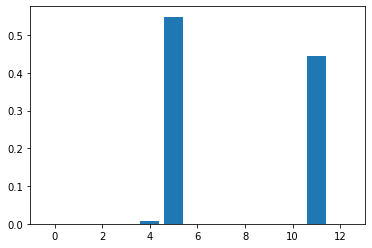

In [279]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

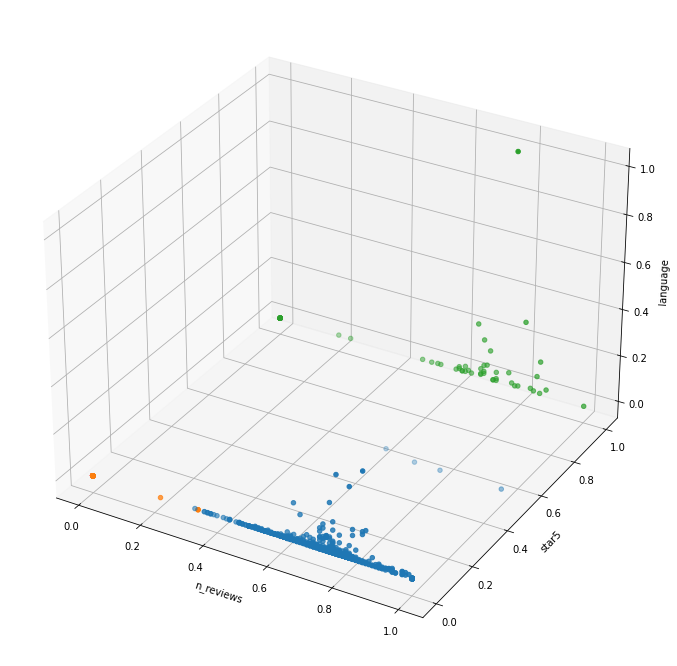

In [280]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [4, 5, 11])

C:\Users\nikol\AppData\Local\Temp/ipykernel_7436/2349367404.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature: 0, Score: 0.02584
Feature: 1, Score: 0.02829
Feature: 2, Score: 0.04501
Feature: 3, Score: 0.04243
Feature: 4, Score: 0.23226
Feature: 5, Score: 0.21929
Feature: 6, Score: 0.04653
Feature: 7, Score: 0.02697
Feature: 8, Score: 0.01002
Feature: 9, Score: 0.00323
Feature: 10, Score: 0.01558
Feature: 11, Score: 0.27769
Feature: 12, Score: 0.02686


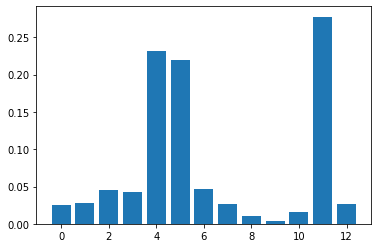

In [281]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00134
Feature: 2, Score: 0.00163
Feature: 3, Score: 0.00873
Feature: 4, Score: 0.00681
Feature: 5, Score: 0.38300
Feature: 6, Score: 0.00022
Feature: 7, Score: 0.01633
Feature: 8, Score: 0.02366
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00185
Feature: 11, Score: 0.55250
Feature: 12, Score: 0.00393


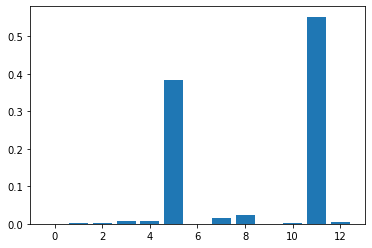

In [282]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

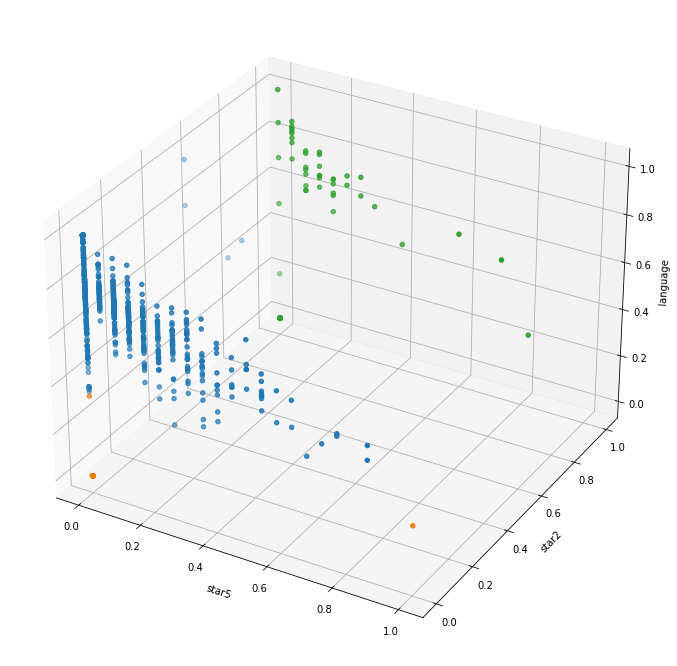

In [284]:
printClusters(df_pca_km4, df_pca_km4['pca_km_labels'], [5, 8, 11])

### Zakljucak 1. Definitivno imamo 4 klastera!
#### Najbitniji feature-i su: 5-star5, 10-dimensions, 12-language (kada koristimo dimensions)
#### Najbitniji feature-i su: 5-star5, 11-language, 12-publisher (kada koristimo dimensions)
#### n_reviews takodje ima prilicno visok importance ali ne daje dobre klastere

### Zakljucak 2. Kmeans algoritam daje najbolje rezultate

In [287]:
### Sta kazu klasteri?

#### Klaster1:
#### Klaster2:
#### Klaster3:
#### Klaster4:

### Cuvanje dataseta i labela koje smo dobili (bez dimensions)

In [291]:
# grafik za svaki klaster, da vidimo koje su vrednosti za najvaznije kolone

In [290]:
#df.to_csv('file_name.csv')

df_pca_km4.to_csv('pca_km4_no_dimensions.csv')

In [292]:
df_pca_km4.columns

Index(['price', 'price (including used books)', 'pages', 'avg_reviews',
       'n_reviews', 'star5', 'star4', 'star3', 'star2', 'star1', 'weight',
       'language', 'publisher', 'pca_km_labels'],
      dtype='object')

# Klasterizacija koriscenjem samo kolona koje smo ustanovili da imaju najvecu ulogu

In [293]:
data = df_pca_km4.drop(['price', 'price (including used books)', 'pages', 'avg_reviews', 'star4', 'star3', 'star2', 'star1', 'weight',
'pca_km_labels'], axis=1)

In [294]:
data

,n_reviews,star5,language,publisher
0,0.000866,0.55,0.0,0.60
1,0.004669,0.61,0.0,0.50
2,0.000377,0.87,0.0,0.60
3,0.063479,0.75,0.0,0.50
4,0.000452,0.52,0.0,0.25
...,...,...,...,...
825,0.002786,0.72,0.0,0.60
826,0.003502,0.78,0.0,0.90
827,0.000301,0.83,0.0,0.65
828,0.000000,0.00,1.0,0.55


3
[1 1 1 1 0 2 1 1 0 0 1 0 2 1 0 1 2 1 0 1 1 1 1 3 1 3 1 0 2 1 3 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 0 1 0 0 1 0 3 0 0 1 1 0 3
 0 0 1 0 2 0 1 0 1 0 0 1 3 3 0 1 0 1 0 1 1 0 3 3 1 1 1 3 1 3 0 1 0 1 3 0 1
 0 0 1 1 0 1 1 0 0 1 1 1 3 3 1 1 1 1 0 1 1 1 3 2 0 1 1 2 1 0 1 1 1 0 3 1 1
 1 1 1 0 0 1 3 1 1 0 0 1 1 1 1 1 1 1 3 3 0 1 1 1 3 1 1 1 0 1 1 1 1 1 1 1 1
 3 1 0 1 0 1 3 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 3 2 0 1 1 1 1 1 1 3 1 1 1 1 1
 3 0 1 1 3 1 3 0 1 1 3 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 3 0 0 1 1 1 0 3 1 1 1 0 0 0 1 0 1 1 0 1 3 1 3 1 1 1 0 2 1 1 1 1 3
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 2 1 3 0 3 1 1 1 0 3 0 1 0 1 1 1 0 1 1 1 2 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 3 0 1 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 2 0 0 2 2 0 0 3 2 2 2 2 2 1 2 2 0 2 1 1 1 0 0 2 3 0 1 1 2
 3 1 0 2 1 3 1 0 0 0 1 1 3 2 0 1 1 2 1 1 3 3 3 3 1 0 1 1 1 1 1 1 3 1 0 0 2
 1 1 0 1 2 1 3 1 1 0 1 0 0 1 1 0 1 2 1 1 1 1 2 1 3 1 1 1 0 0 1 2 2 1 1 1 0
 1 0 3 0 3 3 1 1 1 1 2 

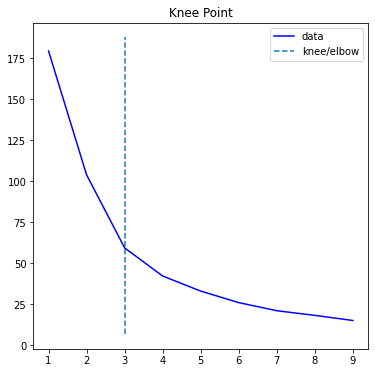

In [297]:
#elbow algorithm
distortions = []
#df = df_scaled
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)
kl.plot_knee()

###################################
num_clusters = 4
###################################

km_model = KMeans(n_clusters=num_clusters, random_state=10, algorithm="elkan")
km_labels = km_model.fit_predict(data)

print(km_labels)
print(len(km_labels))
print("Silhouette score: ", silhouette_score(data, km_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(data, km_labels))



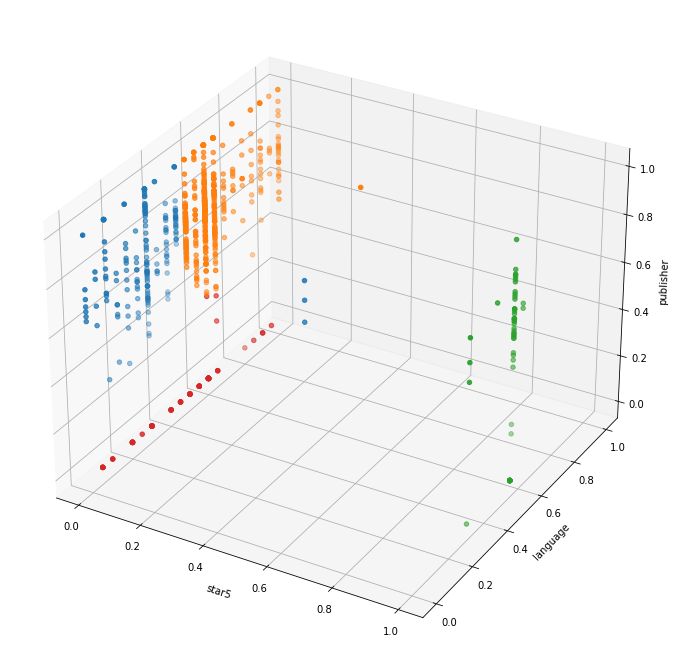

In [300]:
printClusters(data, km_labels, [1, 2, 3])

# Klaster 1 crveni: nista nije vazno
# Klaster 2 zeleni: ugl na engleskom, uglavnom dobro ocenjeni
# Klaster 3 narandzasti: razliciti jezici, star 5 nije vazan, razl pubisheri
# Klaster 4 plavi: razliciti jezici, star 5 nije vazan, razl pubisheri

# Razlika izmedju klastera 3 i 4 je u jeziku!

### Cuvanje dataseta i labela koje smo dobili (sa dimensions)

In [301]:
df

,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,0.004371,0.004371,0.167118,0.85000,0.000866,0.55,0.609375,0.122449,0.000000,0.000000,0.964815,0.083708,0.0,0.60
1,0.024838,0.020197,0.161705,0.82500,0.004669,0.61,0.312500,0.183673,0.181818,0.206897,0.883333,0.064833,0.0,0.50
2,0.023586,0.023586,0.090663,0.92500,0.000377,0.87,0.203125,0.000000,0.000000,0.000000,0.905556,0.046289,0.0,0.60
3,0.040220,0.040220,0.183018,0.90000,0.063479,0.75,0.250000,0.102041,0.090909,0.068966,0.444444,0.048607,0.0,0.50
4,0.017833,0.017833,0.122463,0.72500,0.000452,0.52,0.265625,0.204082,0.454545,0.344828,0.622222,0.042977,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.003293,0.015898,0.068336,0.87500,0.002786,0.72,0.218750,0.142857,0.090909,0.137931,0.359259,0.032008,0.0,0.60
826,0.041123,0.040072,0.191813,0.87500,0.003502,0.78,0.109375,0.142857,0.181818,0.137931,0.227778,0.074436,0.0,0.90
827,0.033390,0.033390,0.095399,0.95000,0.000301,0.83,0.265625,0.000000,0.000000,0.000000,0.709259,0.036354,0.0,0.65
828,0.034530,0.031929,0.130244,0.86802,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.055511,1.0,0.55


In [305]:
data_with_dimensions = df.drop(['price', 'price (including used books)', 'pages','n_reviews', 'avg_reviews', 'star4', 'star3', 'star2', 'star1', 'weight',], axis=1)

In [306]:
data_with_dimensions

,star5,dimensions,language,publisher
0,0.55,0.964815,0.0,0.60
1,0.61,0.883333,0.0,0.50
2,0.87,0.905556,0.0,0.60
3,0.75,0.444444,0.0,0.50
4,0.52,0.622222,0.0,0.25
...,...,...,...,...
825,0.72,0.359259,0.0,0.60
826,0.78,0.227778,0.0,0.90
827,0.83,0.709259,0.0,0.65
828,0.00,1.000000,1.0,0.55


4
[2 2 2 0 2 3 0 2 0 2 0 0 3 0 2 2 3 2 0 2 0 0 2 1 2 1 0 2 3 0 1 2 2 0 2 0 0
 0 2 0 0 2 0 2 0 0 0 0 2 2 0 3 0 0 3 3 2 0 2 0 0 0 2 0 0 2 0 1 2 2 2 0 0 1
 0 2 2 0 3 2 0 0 2 0 2 0 1 1 0 2 2 0 2 0 0 2 1 1 2 0 2 1 0 1 2 2 2 0 1 2 2
 1 0 2 2 2 2 2 2 2 0 0 2 1 1 2 0 2 0 0 0 2 0 1 3 2 0 2 3 2 2 2 2 0 0 1 2 0
 2 0 2 0 0 0 1 0 2 1 0 2 0 2 0 0 2 0 1 1 0 0 0 0 1 0 2 2 0 2 0 2 0 0 2 2 2
 1 2 0 2 0 0 1 2 0 2 0 0 2 0 2 2 2 0 0 0 2 0 1 3 2 2 2 0 2 2 2 1 2 2 2 0 2
 1 1 0 2 1 2 1 2 0 2 1 0 0 2 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 2 0 0 0 2 2
 0 0 0 0 1 2 0 0 0 2 0 1 2 0 0 0 0 2 2 0 2 2 2 0 0 2 1 0 2 0 0 3 0 0 0 0 1
 2 0 2 2 2 0 2 0 2 2 2 2 0 0 0 3 2 1 0 1 0 2 2 0 1 0 2 2 0 0 0 2 0 2 0 3 2
 0 0 2 2 0 0 2 2 2 0 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 0 0 2 2 0 2 2 2
 2 0 2 0 2 2 0 0 3 0 2 3 3 0 0 1 3 3 3 3 3 2 3 3 0 3 0 2 2 2 0 3 1 0 2 2 3
 1 2 0 3 2 1 0 0 2 2 0 2 1 3 0 2 2 3 0 2 1 1 1 1 2 0 0 0 2 2 2 2 1 0 0 0 3
 0 2 2 2 3 2 1 0 2 0 0 2 0 2 2 0 2 3 2 0 2 2 3 2 1 2 0 0 2 2 0 3 3 2 0 2 0
 0 0 1 0 1 1 2 2 2 2 3 

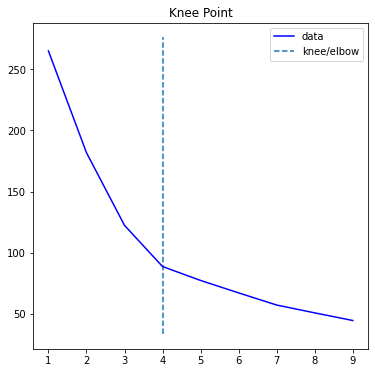

In [307]:
#elbow algorithm
distortions = []
#df = df_scaled
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_with_dimensions)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)
kl.plot_knee()

###################################
#num_clusters = 4
###################################

km_model = KMeans(n_clusters=num_clusters, random_state=10, algorithm="elkan")
km_labels = km_model.fit_predict(data_with_dimensions)

print(km_labels)
print(len(km_labels))
print("Silhouette score: ", silhouette_score(data_with_dimensions, km_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(data_with_dimensions, km_labels))



In [308]:
data_with_dimensions.columns

Index(['star5', 'dimensions', 'language', 'publisher'], dtype='object')

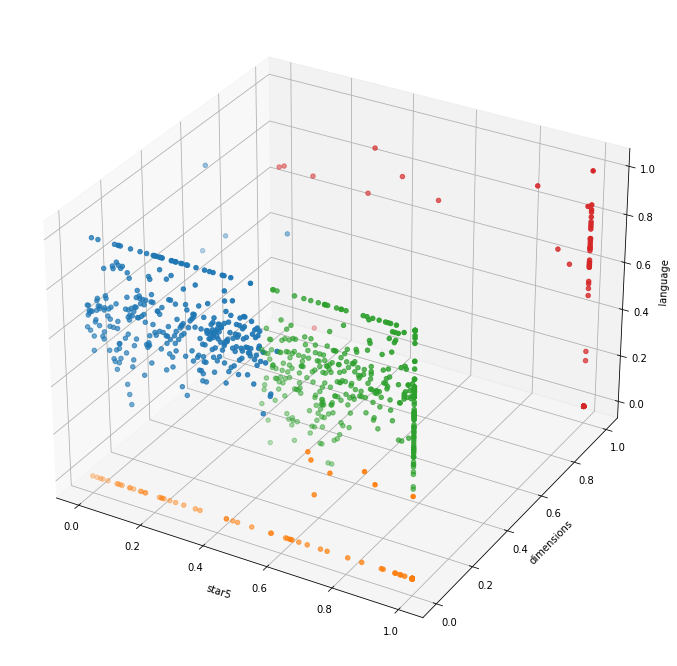

In [311]:
printClusters(data_with_dimensions, km_labels, [0, 1, 2])

# Klaster 1 crveni: svi jezici, uglavnom jedna dimenzija, najbolje ocenjene knjige uz par izuzetaka
# Klaster 2 zeleni: ugl jedna dimenzija, vise jezika - 2, vece vr za star5 
# Klaster 3 narandzasti: sve vrednosti u star5, jedna dimenzija, jezik other
# Klaster 4 plavi: ugl jedna dimenzija, vise jezika - 2, nize vr za star5 
